# Data Processing and Visualization

In [81]:
import numpy as np
import json
f = json.load(open('IWSC.json','r'))
print(len(f))
print(f)

630
[{'name': 'BAMco', 'description': 'We build homes, and offer freelance consulting and project management for the construction and property industries (including community buildings, residential property, commercial units and industrial facilities). Our focus is on estimating and costs, however, we also dabble in design.', 'id': 0, 'ES_competitors': [], 'ES_consumers': [], 'ES_suppliers': [], 'ES_unrelated': [], 'SL_consumers': [], 'SL_not_consumers': [], 'SL_suppliers': [], 'SL_not_suppliers': [], 'SL_competitors': [], 'SL_not_competitors': []}, {'name': 'Shanklin Theatre Ltd', 'description': 'Entertainment attraction for tourism and the Island.', 'id': 1, 'ES_competitors': [212], 'ES_consumers': [], 'ES_suppliers': [207, 296], 'ES_unrelated': [188, 65, 208, 618, 43, 506, 89], 'SL_consumers': [], 'SL_not_consumers': [], 'SL_suppliers': [], 'SL_not_suppliers': [], 'SL_competitors': [], 'SL_not_competitors': []}, {'name': 'Appuldurcombe Gardens Holiday Park', 'description': 'Our idyl

In [82]:
import pandas as pd
data = []
with open("IWSC.json", 'r') as f: 
    listobject = json.load(f)
    for listelement in listobject: 
        d = {'name': listelement['name'], 
             'description': listelement['description'], 
             'id': listelement['id'],
             'ES_competitors': listelement['ES_competitors'], 
             'ES_consumers': listelement['ES_consumers'], 
             'ES_suppliers': listelement['ES_suppliers'], 
             'ES_unrelated': listelement['ES_unrelated'], 
             'SL_consumers': listelement['SL_consumers'], 
             'SL_not_consumers': listelement['SL_not_consumers'], 
             'SL_suppliers': listelement['SL_suppliers'], 
             'SL_not_suppliers': listelement['SL_not_suppliers'], 
             'SL_competitors': listelement['SL_competitors'], 
             'SL_not_competitors': listelement['SL_not_competitors']}
        data.append(d)
        
data = pd.DataFrame(data)

In [83]:
print(data)

                                   name  \
0                                 BAMco   
1                  Shanklin Theatre Ltd   
2    Appuldurcombe Gardens Holiday Park   
3              DC Employment Solicitors   
4                           KL Services   
..                                  ...   
625                       Workboatsales   
626                    www.steeljrv.com   
627                         Xodus Group   
628                 Yaang Pipe Industry   
629                       Yacht Kit Ltd   

                                           description   id ES_competitors  \
0    We build homes, and offer freelance consulting...    0             []   
1    Entertainment attraction for tourism and the I...    1          [212]   
2    Our idyllic family holiday park is situated wi...    2   [80, 66, 88]   
3    Dedicated employment law solicitors offering c...    3             []   
4    Production of plastic cards eg loyalty members...    4             []   
..             

In [84]:
print(data['description'])
print(data['description'][0])

0      We build homes, and offer freelance consulting...
1      Entertainment attraction for tourism and the I...
2      Our idyllic family holiday park is situated wi...
3      Dedicated employment law solicitors offering c...
4      Production of plastic cards eg loyalty members...
                             ...                        
625    Single point website for builders, operators a...
626    Type: Welded Neck Flange, Material: ASTM A182 ...
627    Concept evaluation and site selection (includi...
628    ASME B16.5 A182 F316L WNRF Flange, 1. Material...
629    Yacht Kit are the UK distributors for GOTOP cl...
Name: description, Length: 630, dtype: object
We build homes, and offer freelance consulting and project management for the construction and property industries (including community buildings, residential property, commercial units and industrial facilities). Our focus is on estimating and costs, however, we also dabble in design.


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


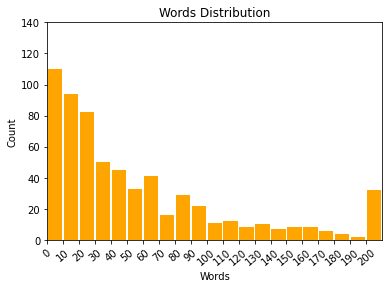

In [85]:
import matplotlib.pyplot as plt
length = []
words = []
words_plot = []
for item in data['description']:
    length.append(len(item))
    text = item.split()
    words.append(len(text))
    words_plot.append(len(text) if len(text)<=200 else 210 )
bin = [n for n in range(0,210,10)]
bin.append(max(words_plot))
print(bin)
plt.hist(words_plot,bins=bin,rwidth=0.9,color='orange')
xrange = [0,max(words_plot)]
plt.xlim(xrange)
plt.xticks(range(0,max(words_plot),10),rotation=40)
plt.ylim([0,140])
plt.title('Words Distribution')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [86]:
print(np.average(length))
print(np.average(words))

411.7984126984127
60.94126984126984


## Interaction Data Pre-processing

In [87]:
total = 0
items = 0
unique = []
interaction_SL_suppliers = []
i = 0
for item in data['SL_suppliers']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
            interaction_SL_suppliers.append([i,num])
    i += 1
unique = list(set(unique))
print('SL_suppliers')
print(total)
print(items)
print(len(unique))
print(interaction_SL_suppliers)

total = 0
items = 0
unique = []
for item in data['SL_not_suppliers']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
unique = list(set(unique))
print('SL_not_suppliers')
print(total)
print(items)
print(len(unique))

total = 0
items = 0
unique = []
interaction_SL_consumers = []
i = 0
for item in data['SL_consumers']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
            interaction_SL_consumers.append([i,num])
    i += 1
unique = list(set(unique))
print('SL_consumers')
print(total)
print(items)
print(len(unique))
print(interaction_SL_consumers)

total = 0
items = 0
unique = []
for item in data['SL_not_consumers']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
unique = list(set(unique))
print('SL_not_consumers')
print(total)
print(items)
print(len(unique))

total = 0
items = 0
unique = []
for item in data['SL_competitors']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
unique = list(set(unique))
print('SL_competitors')
print(total)
print(items)
print(len(unique))

total = 0
items = 0
unique = []
for item in data['SL_not_competitors']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
unique = list(set(unique))
print('SL_not_competitors')
print(total)
print(items)
print(len(unique))

total = 0
items = 0
unique = []
interaction_ES_suppliers = []
i = 0
for item in data['ES_suppliers']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
            interaction_ES_suppliers.append([i,num])
    i += 1
unique = list(set(unique))
print('ES_suppliers')
print(total)
print(items)
print(len(unique))
print(interaction_ES_suppliers)

total = 0
items = 0
unique = []
interaction_ES_consumers = []
i = 0
for item in data['ES_consumers']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
            interaction_ES_consumers.append([i,num])
    i += 1
unique = list(set(unique))
print('ES_consumers')
print(total)
print(items)
print(len(unique))
print(interaction_ES_consumers)

total = 0
items = 0
unique = []
for item in data['ES_competitors']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
unique = list(set(unique))
print('ES_competitors')
print(total)
print(items)
print(len(unique))

total = 0
items = 0
unique = []
for item in data['ES_unrelated']:
    if(len(item)>0):
        total += len(item)
        items += 1
        for num in item:
            unique.append(num)
unique = list(set(unique))
print('ES_unrelated')
print(total)
print(items)
print(len(unique))

SL_suppliers
142
15
75
[[323, 562], [323, 561], [323, 359], [323, 350], [323, 541], [391, 429], [391, 559], [391, 455], [391, 570], [391, 614], [391, 619], [391, 561], [391, 483], [391, 415], [391, 587], [391, 371], [391, 459], [391, 432], [391, 420], [391, 359], [391, 547], [391, 440], [391, 486], [391, 421], [391, 477], [391, 534], [391, 428], [391, 466], [391, 511], [391, 340], [391, 324], [391, 467], [391, 573], [391, 399], [391, 334], [398, 524], [398, 399], [419, 339], [419, 338], [419, 334], [419, 529], [419, 517], [424, 529], [424, 448], [439, 456], [439, 594], [441, 437], [441, 432], [441, 587], [441, 454], [441, 470], [441, 566], [441, 438], [441, 420], [478, 336], [478, 334], [478, 338], [478, 332], [478, 529], [478, 324], [478, 412], [478, 606], [478, 538], [482, 609], [482, 460], [482, 488], [482, 524], [505, 578], [505, 418], [505, 456], [505, 325], [505, 357], [505, 553], [505, 340], [505, 334], [505, 341], [505, 338], [505, 517], [505, 423], [505, 336], [505, 459], [505

## Textual Data Embedding

In [96]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [97]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [129]:
import torch
embeddings = []
f = open("embeddings.txt","w")
for item in data['description']:
    print([item])
    a = embed([item])[0]
    print(a)
    embeddings.append(a)
    f.write(str(a))
f.close()

['We build homes, and offer freelance consulting and project management for the construction and property industries (including community buildings, residential property, commercial units and industrial facilities). Our focus is on estimating and costs, however, we also dabble in design.']
tf.Tensor(
[-0.02336019  0.058956    0.02985651  0.00380419  0.06245767 -0.05035502
  0.0114301  -0.05078739  0.073525   -0.03355978  0.04797663 -0.05096532
 -0.00946159  0.00087415  0.01337533 -0.00704568  0.01372501 -0.04401005
  0.00483756 -0.05871527  0.07309079 -0.00097125  0.06863448 -0.06956743
  0.03819083  0.00087963  0.02460523 -0.03913427  0.05259594 -0.00109176
  0.02964534 -0.03531744 -0.03045274 -0.04010836 -0.07105809 -0.07340997
  0.06226101  0.01800756 -0.05241215 -0.06330238 -0.05744459  0.07631586
  0.03041194  0.05729593 -0.07754947  0.01757021 -0.06483904 -0.0011803
 -0.06037989 -0.01579143 -0.02008174 -0.04691793 -0.05120294  0.05483133
 -0.03652804  0.02237421 -0.06201345  0.01

['We make biltong on the Isle of Wight We use British beef to produce this tasty high protein snack We wholesale to delis and direct sell to customers.']
tf.Tensor(
[-0.07023314  0.0476671   0.0219569   0.05443406  0.0502339  -0.02798079
  0.043235   -0.04271107  0.02408199 -0.06578734  0.00943086 -0.02916089
 -0.02678153  0.05138217 -0.08232751  0.02923277  0.03831819 -0.0524371
 -0.07238084  0.05904409 -0.07082818 -0.01468895  0.03430237 -0.06889132
 -0.03357024 -0.03738097 -0.01843186  0.06136139 -0.0417148  -0.00628067
 -0.00050779  0.03096706  0.01352567 -0.01356922 -0.01217922  0.03908259
 -0.05081648  0.04740311  0.01103984 -0.06905554 -0.06820639  0.04965372
  0.08017777  0.00634215 -0.07042134 -0.00808552  0.04341985 -0.03056083
 -0.07811464 -0.06211583 -0.0522129  -0.0530829  -0.02779808 -0.02055635
  0.02417062  0.01748761  0.00871406 -0.08192408  0.01976888 -0.00244018
  0.0501808   0.00477077  0.03364557 -0.00371492 -0.06548557  0.01413426
  0.0327645   0.03035156  0.01269

['Start up business training and counselling.']
tf.Tensor(
[ 0.04701373  0.01047111 -0.06063116  0.05272683 -0.0655138   0.04632392
 -0.0063621  -0.04096682  0.06342557 -0.04143473  0.0232695  -0.02933582
 -0.00223718 -0.06672506  0.01857888 -0.05684509 -0.06223765 -0.0151766
 -0.04020175  0.00121749 -0.04180157  0.0557844   0.06359982 -0.04081972
 -0.02084438 -0.05768882  0.01682534 -0.05620813 -0.03947594 -0.05847262
  0.0434239   0.01939096  0.05426782 -0.03334205 -0.08116231 -0.02665101
  0.01337394 -0.01759812  0.04291808  0.01910748 -0.02942936  0.03629027
  0.03102012  0.01149467  0.04709429 -0.01467504 -0.05211744 -0.08284207
  0.03776398 -0.01459218 -0.07166301  0.06334087 -0.04919024 -0.06814114
  0.02082643  0.06042671  0.06643609 -0.07299212 -0.03851912  0.0048564
 -0.05376325  0.05272588  0.02846143 -0.02871726 -0.05259293 -0.02590857
 -0.03036752 -0.04948492  0.00113125  0.08439179  0.04984388 -0.0254507
  0.01700773 -0.02599196 -0.05486012 -0.0924445  -0.05042532  0.0209

['Whether you are looking to new build development ventures or breathing new life and purpose into an existing property Elmstone Design LLP can assist you from initial advice through to full design with project management services to realise your projects full potential Elmstone Design LLP can also provide separate specialisms such as Structural and Conservation Engineering Planning Consultation Building Surveys or D Visualisation.']
tf.Tensor(
[ 0.05115148 -0.06335928  0.03236591  0.01611688 -0.06287725 -0.01561685
  0.02608851  0.05350679  0.04071415 -0.07025895  0.04562967 -0.00935839
  0.06103515 -0.00835629  0.02565018 -0.00202188 -0.02344627 -0.0446301
 -0.06962497 -0.04509212  0.07610507  0.03757754  0.06931928 -0.06079508
 -0.01107851 -0.05510334 -0.00623618  0.01072903 -0.05026324  0.00016449
 -0.04288567  0.03889595  0.04598779  0.02595112 -0.05890544 -0.06528734
 -0.05899714  0.01605451 -0.06099134  0.00464462 -0.03146715  0.06573837
 -0.01720929 -0.05076976 -0.05254164 -0.0

['Topographic and engineering surveys measured building and GPS surveying.']
tf.Tensor(
[ 0.03888113 -0.04066235 -0.03891652 -0.02986646  0.07156511 -0.05498755
 -0.0252506   0.03798965 -0.05282561 -0.07134669 -0.00076006 -0.03051911
  0.05839838  0.06613369  0.05576267 -0.01994048  0.02490376  0.06993015
  0.0011017  -0.05948092  0.00856608  0.06676397 -0.01679297  0.06503595
 -0.04744997 -0.02231089 -0.0079081  -0.02955119  0.05029541 -0.05657525
 -0.05220687  0.0611211   0.0027751   0.01228525 -0.04102921  0.03983909
 -0.07599542  0.03692042  0.00814309 -0.03313874 -0.0085088  -0.00836479
  0.02249162 -0.01733673 -0.07461168 -0.04134864 -0.05245744  0.05306497
 -0.02607335 -0.06271698  0.02763277  0.03302366 -0.0637833   0.0268917
 -0.0015164   0.07062685  0.03393815  0.02115338  0.02573359 -0.05305324
  0.06435949 -0.04308179  0.0563263   0.03262866  0.00888301  0.03729117
 -0.02818659 -0.02036973 -0.06221839 -0.02118387  0.06379359 -0.01148125
 -0.04263968  0.00435055 -0.04202693 

['DC engineering are electromechanical engineers offering a specialist portable appliance testing service using the latest testing equipment and software.']
tf.Tensor(
[-0.06793639  0.02013379 -0.01714284 -0.00514065  0.05423354 -0.03373517
 -0.0137349  -0.06351687 -0.03800779 -0.06308968  0.02379267 -0.05623216
  0.02643103  0.01585517  0.02770284 -0.00856421  0.01971704  0.04641857
  0.05148385 -0.06232663  0.03917046 -0.04586553  0.02461477  0.00679901
  0.04561084 -0.02195952 -0.06054466  0.07380655 -0.00613176 -0.05479294
 -0.069657    0.07157703 -0.08043234  0.04791435 -0.01905956 -0.02703127
 -0.04595405 -0.06744463 -0.07194962  0.06977911  0.02288095 -0.03659459
 -0.01333982  0.00342522 -0.01159541  0.04246907  0.00273677 -0.03002035
 -0.00591479 -0.04362025 -0.01117023 -0.03302318 -0.00699804  0.02549885
 -0.02813338  0.06140007  0.02679025 -0.05211331 -0.0340535   0.00662128
  0.02106006  0.00927302 -0.00871823  0.02262953 -0.03983241  0.00427147
  0.06341612 -0.06750473 -0.0

tf.Tensor(
[ 3.23209614e-02 -6.01750659e-03 -6.37118071e-02 -3.63331288e-02
 -6.60420209e-02  8.18946436e-02  4.22565080e-02  9.83888749e-03
  7.78921396e-02 -6.61824048e-02 -1.80719066e-02  4.66478430e-02
  5.00770919e-02 -4.98676635e-02  7.14063570e-02 -1.66830067e-02
  4.24483530e-02  3.99358496e-02  4.65949997e-02 -4.68021855e-02
 -4.72766533e-02  3.63586918e-02 -6.07573427e-02  1.51676955e-02
  6.66856617e-02  2.24973168e-02  3.83935086e-02 -4.96139191e-02
 -2.69078519e-02 -3.95739526e-02 -3.49667966e-02  3.11046857e-02
  5.53625403e-03  2.31883349e-03 -3.57364230e-02 -4.24092710e-02
  1.84369981e-02 -2.29687453e-03  5.02804071e-02 -1.08249895e-02
 -1.62396096e-02  3.21149342e-02  3.26694995e-02 -4.15478088e-02
 -5.92061020e-02  4.12903689e-02  4.74630296e-02  2.10106522e-02
 -1.39356079e-02  7.77314603e-03  3.03137265e-02 -4.83940654e-02
  4.34261858e-02 -2.76423246e-02 -5.49067650e-03 -2.94736377e-03
 -3.71659212e-02 -8.25500339e-02  6.56984374e-02  1.02592567e-02
 -4.25677113e-

['Set in the heart of the beautiful seaside village of Seaview on the Isle of Wight Seaview Beauty Clinic offers a haven of peace and tranquillity where health and wellbeing take centre stageRun by beauty expert and owner Jane Baranova Gibbs her approach is holistic and her focus is on getting results and providing long term skin benefits On offer are a range of bespoke beauty treatments and remedial therapies alongside new and innovative cosmetic procedures Jane is a qualified specialist in skin improvement treatments including mole reduction skin tag removal and advanced electrolysis The aim of the Seaview Beauty Clinic is to provide skin care benefits and physical improvements for everyone ensuring they leave not only looking great but feeling great too Member to member discount.']
tf.Tensor(
[-0.06107687 -0.0403544   0.04358076 -0.0414128  -0.00665483 -0.04914314
  0.05774679 -0.01570929  0.05832156 -0.05929076  0.0629506  -0.04437335
 -0.03966779 -0.0571674   0.04676811  0.0515707

tf.Tensor(
[-0.02673519  0.07010946  0.00126721 -0.01369839  0.01660422 -0.07211589
 -0.00834073 -0.01217331  0.05936455  0.00861918 -0.01974847 -0.02016806
  0.03894476  0.03514813  0.07226661  0.05990489  0.05112097  0.00519114
  0.01223135 -0.03492041  0.01948701 -0.01300784  0.00078434  0.01399739
  0.06797074  0.05412367 -0.06255354  0.05330516  0.03080836 -0.06141581
 -0.01672891  0.03652418 -0.04441398  0.04940848 -0.06093332 -0.000241
  0.05535299  0.00782831 -0.02157536 -0.00857234  0.04492109  0.01009396
 -0.01805551  0.0220981  -0.05790774  0.0490156  -0.01517879 -0.06523667
 -0.02189039  0.06699362 -0.03774728 -0.01785454 -0.00575884  0.00100993
 -0.07396507 -0.02697858 -0.07249072 -0.07084757  0.03283839 -0.0605167
 -0.00403814  0.06446493  0.0550717   0.0290093  -0.07828614 -0.0399795
 -0.00342169  0.05812475 -0.0512048   0.04612618  0.07209264  0.03260852
 -0.05731656 -0.05465093 -0.0248769  -0.08092052 -0.01667465 -0.00445346
 -0.00369252 -0.03333145  0.07729032 -0.0045

['Learn Spanish In offers quality Spanish courses in Spain and Latin America for all ages. Courses for over 30 and 50 years are a particular focus. I have visited all of the Spanish schools offered on the web page. these are selected based on their accreditation, teaching experience, range and quality of accommodation, social programme and related services. Teaching, learning and travelling are my passions.']
tf.Tensor(
[ 0.01147718 -0.07497478  0.01687849  0.0096179  -0.02909922  0.04659506
 -0.07229848 -0.00125279 -0.03946253 -0.06575342 -0.02595627 -0.01104184
 -0.00574553 -0.02490721  0.02753615  0.01768047 -0.01663352  0.06064579
  0.06141499 -0.07579177  0.03784027 -0.07420107  0.02700378  0.03853726
 -0.05666843 -0.05586501  0.07047984  0.04266133  0.00216402 -0.0512902
 -0.0133279  -0.00034851 -0.0252825  -0.06303948 -0.03469872 -0.02590583
  0.0315378   0.02974915  0.07581931  0.07466907 -0.04031382  0.02365527
  0.04619088  0.03201151  0.04957242  0.00937496 -0.00884748 -0.04

['Internationally renowned specialist makers of award winning luxury ice-creams and sorbets Great Taste Awards and more than varieties including DolceVita a patented range of healthy products for Guilt. free Gourmets available in a range of sizes from mls litres with a range of the finest accessories for the sale of ice creams in every location from local kiosk to specialist delicatessen National distribution through selected wholesalers please contact for details Retail mail order service also available by telephone or email.']
tf.Tensor(
[-6.05676435e-02 -5.28671220e-03 -6.58142939e-02  4.29453850e-02
  6.33037239e-02 -4.71286401e-02  2.38170940e-02 -5.11050113e-02
  3.67162637e-02 -7.16842189e-02 -3.69469710e-02  1.18326964e-02
  2.17775740e-02 -6.28200024e-02  1.39612118e-02  1.72076561e-02
  6.18265308e-02  2.12064069e-02  3.93792242e-02  3.69326845e-02
  5.66855483e-02 -5.95526919e-02  5.97882159e-02 -4.73207571e-02
  5.51683940e-02  2.40780711e-02 -1.35814082e-02  3.68232355e-02

['Counselling/psychotherapy, clinical supervision, training']
tf.Tensor(
[ 5.14189117e-02  5.01707569e-02 -5.44387475e-02  2.09782068e-02
 -6.13236353e-02  6.94727674e-02  1.22509943e-02  7.40965770e-04
  3.93520072e-02 -2.96483096e-02  7.83867165e-02  7.78127313e-02
 -2.85313744e-02 -7.61324465e-02  8.31820164e-03 -8.33711936e-04
 -9.04450938e-02  4.91996519e-02 -4.15895949e-04 -7.27908909e-02
 -2.65760701e-02  2.94758808e-02 -4.74101454e-02  1.41616762e-02
  2.09181011e-02 -3.60917188e-02 -8.32661986e-02  5.54923750e-02
 -4.05226536e-02  1.54326698e-02 -5.29572628e-02  9.07092616e-02
  5.16276211e-02  5.21755107e-02  4.73138541e-02  8.15266520e-02
 -6.61104470e-02 -7.10838586e-02  3.70676294e-02 -4.97435294e-02
 -3.31617035e-02  7.99081847e-02  2.61095259e-02 -2.21209750e-02
 -6.81274105e-03 -4.71598245e-02  5.71497492e-02  6.78816810e-02
 -3.20365541e-02  6.79612607e-02 -1.81982256e-02  5.19956835e-02
 -3.78872305e-02 -1.77906100e-02  6.58646086e-03 -4.67895418e-02
 -3.98825126e-04 

['Italian Restaurant']
tf.Tensor(
[ 9.29501373e-04  2.15611234e-02  2.57305913e-02 -3.17347795e-02
 -9.60413192e-04  7.74394646e-02 -5.03953807e-02 -2.01153755e-02
  3.66735719e-02 -2.84181926e-02 -2.46109180e-02 -7.72714093e-02
 -9.82308295e-03  2.00066492e-02 -8.97101164e-02  4.68535814e-03
 -6.20678253e-03  4.63472605e-02  9.90453735e-03 -1.35890609e-02
  5.84209105e-03  1.46439541e-02  1.85749922e-02 -4.76856977e-02
 -4.89093587e-02  8.23270809e-03  4.72244024e-02 -1.63254105e-02
  5.58206765e-03  3.72273996e-02  8.26567411e-03 -4.63078395e-02
  7.16126785e-02 -2.60178614e-02 -2.08308436e-02  4.60870825e-02
 -1.94822140e-02 -7.86552485e-03 -3.92180383e-02 -3.61896791e-02
 -5.84841147e-02 -7.77258053e-02  8.70825872e-02 -6.41423538e-02
 -6.04869947e-02  4.16584350e-02 -4.63768430e-02  3.66984420e-02
  5.15263118e-02 -7.62502477e-02 -6.44255131e-02  3.98972668e-02
  7.43194595e-02  3.02978810e-02  1.24803372e-02  2.39152666e-02
  6.07782155e-02  5.85349612e-02  8.57622027e-02 -6.0734

['Bespoke furniture manufacturerAt Corporate Furniture and Interiors we pride ourselves on the quality of our craftsmanship and our professional service We manufacture unique and original furniture at our own premises using our own fully skilled craftsmen and the best quality materials for both corporate and private clients.']
tf.Tensor(
[-0.07017428 -0.03240325  0.00043292  0.07126967  0.07163276  0.06441838
 -0.0074778  -0.0624943   0.05937141 -0.05965239  0.0014964   0.02301358
  0.00364518 -0.02367584  0.0540856  -0.04275674 -0.01995334 -0.04177348
  0.04762051 -0.01509194  0.06726012 -0.03999714  0.07346312 -0.01886059
 -0.0223478  -0.0033505  -0.05006013  0.05528384  0.07294796  0.05415375
  0.06215654 -0.01342211  0.05344245 -0.06748498  0.00412841  0.05126264
  0.02466627 -0.06379049 -0.04311558 -0.03444469 -0.06804159 -0.06797045
  0.01671495 -0.02046908 -0.06808628  0.07173836 -0.04760762  0.00644919
  0.00681521  0.0029656   0.02803389 -0.0180207  -0.06776489  0.0577019
  0.

["gamban helps individuals and organisations by blocking access to online gambling for improved productivity and reduction of gambling-related harm risk. Individuals can download and install gamban in minutes on Mac OS X, Windows, Android and iOS devices. it's simple, effective, affordable and extremely light-weight. More information here: https://gamban.com/who-we-help/you/, Businesses can improve productivity and reduce the risk of gambling-related harm with gamban, More information here: https://gamban.com/who-we-work-with/your-employees/, Universities, acting in loco parentis, can help protect staff and students by making the software more visible, accessible and available to those who need it. More information here: https://gamban.com/who-we-work-with/universities/, Gambling operators can improve responsible gambling measures by offering gamban to those who need it most. More information here: https://gamban.com/who-we-work-with/gambling-operators/"]
tf.Tensor(
[-2.86968481e-02 -6

tf.Tensor(
[-4.84396219e-02 -5.60819246e-02  3.55934948e-02  4.00008038e-02
 -2.10338198e-02 -1.70204919e-02  3.24762538e-02 -4.71660234e-02
 -4.42126729e-02 -7.47499168e-02 -4.42554317e-02 -6.29023165e-02
  5.84967993e-02 -6.33968040e-02  7.39603862e-02 -1.78199429e-02
  2.45656818e-02  3.22935022e-02 -3.36812511e-02  5.01855612e-02
  1.42936315e-02  8.83977860e-03 -5.76647988e-04  4.33592610e-02
  5.90499490e-02  7.44102597e-02 -4.93250191e-02 -3.86849567e-02
  6.93486780e-02 -6.78028241e-02  6.46619499e-02 -6.62276745e-02
 -2.38110963e-02  5.19760437e-02 -2.27052346e-02 -2.93823313e-02
  6.87162504e-02 -6.36071488e-02  8.10412969e-03  6.16878010e-02
  5.78733459e-02 -6.40674084e-02 -2.22506318e-02 -5.56837097e-02
 -7.35858828e-02  9.39043425e-03  3.94311100e-02 -5.47871888e-02
 -1.06322104e-02 -3.20823081e-02 -5.96267246e-02 -2.54086778e-02
 -7.38291964e-02 -2.07430497e-02 -1.53414661e-03 -3.24044898e-02
 -2.33431961e-02 -6.05585724e-02 -5.70771843e-02 -3.24684158e-02
 -2.54752543e-

['Roach Pittis reputation for first class practical legal advice has been built since Today the firm has seven partners and employs around staff including feeearnersRoach Pittis is able to respond to clients needs with prompt clear advice based on a thorough understanding of their situation and requirements Many of our clients have been with us some considerable time and we have built up an excellent ongoing working relationshipThis website is dedicated to providing you with information about what Roach Pittis has to offer which we hope will be of relevance and interest to you Please contact us if youd like to know more about the firm or what it could do for you.']
tf.Tensor(
[-0.07096608 -0.04306131 -0.01057581  0.00049603  0.01675677 -0.03066387
  0.0323983  -0.05419604 -0.05463479 -0.06342853 -0.01751954 -0.02307938
 -0.00474926  0.00936139  0.02165412  0.05246374  0.04192306  0.03882925
 -0.04311393  0.05092712  0.04444679  0.01429465  0.06388059 -0.04869428
 -0.00769497  0.0117573

["Based in Ryde on the Isle of Wight, Pascall Electronics employs more than 120 members of staff in a purpose built 35,000 sq ft facility. The company consists of two divisions: Power Supplies and RF. Pascall's reputation for reliability is achieved by producing the best possible solutions for all applications, with an option for custom designed units to maximise overall life time value. The company's excellent in-house technical team and production facilities enable it to respond quickly and effectively. Market Sectors, Defence, Civil Aerospace, Industrial, RF and Microwave, Key Technologies/Services, Power Products, RF Products, OCXO series & OCXOF series, Databus Products, Oscillators - Ultra Low Noise VHF Crystal, Website, Visit our website for more in-depth information at: www.pascall.co.uk, Contact Details, Contact: Glyn Higgins, Tel: +44 (0)1983 817300, Email: ku.oc1539082413.llac1539082413sap@s1539082413niggi1539082413hg1539082413, Write: Pascall Electronics Ltd. Westridge Busi

tf.Tensor(
[-0.06105836 -0.01415736 -0.05685761 -0.00206269  0.06034393  0.03173612
 -0.00297238 -0.06373649 -0.06466158 -0.06086187  0.02031186 -0.06257077
  0.0481033  -0.05275017  0.04862072 -0.04628509  0.01933137 -0.04282672
  0.02967128 -0.01708172  0.06274615 -0.04305792  0.00127777 -0.06051463
  0.05397424 -0.05950069 -0.05928086  0.06292389 -0.02077527 -0.03453264
  0.06084989 -0.04680157 -0.06450877  0.022511    0.06277218 -0.0617401
  0.05526154 -0.02493187 -0.05983762 -0.01070622  0.04056852 -0.0008445
  0.00933975 -0.02180015 -0.06059637 -0.03679829 -0.0203288   0.02719458
  0.04110733  0.02793755  0.04902413  0.04225315 -0.06433329 -0.05361162
 -0.05859194  0.05625764 -0.0455918  -0.06385725 -0.06346788 -0.05376542
 -0.03852088 -0.03698096  0.02579415 -0.01925168 -0.06201159 -0.00241955
  0.05417035  0.06346197  0.04481332  0.00589624  0.04122163  0.04814821
 -0.00518052  0.02115582  0.04216377 -0.0646926  -0.06121495 -0.06054481
  0.05257904 -0.03455517  0.06443004  0.04

tf.Tensor(
[ 0.04060465 -0.06558235 -0.05028772 -0.01767116 -0.04758806 -0.04605078
 -0.04935062 -0.02847609 -0.00377301  0.0233604  -0.02067368 -0.05314958
 -0.0275667  -0.06357015  0.00789159  0.07167973  0.01310366 -0.03749694
 -0.05594115 -0.01853179  0.0696883   0.00606398 -0.00972054  0.05643038
  0.02231525  0.00896215  0.06865077  0.07418851  0.01196371 -0.04160541
  0.02553978 -0.0085638   0.01291034 -0.04513628  0.04297983  0.04552406
 -0.06402162 -0.0524193   0.05631636 -0.04239733  0.02221812  0.06875221
 -0.0264592  -0.04741857 -0.04716127  0.04589745 -0.03979835  0.01690771
  0.03188505 -0.01809421 -0.01095502  0.00657491 -0.04133272 -0.01313261
  0.02860772  0.00872662  0.05522473  0.02455116 -0.05924387  0.01346872
  0.0224851  -0.00714968  0.00652295  0.01129928 -0.06305283 -0.03060975
  0.01763202  0.074152   -0.06688226  0.05661894 -0.02040688 -0.06586193
 -0.02179135 -0.03250093 -0.0134343   0.0571508  -0.0556891  -0.06383742
 -0.03488553 -0.0040139   0.07182802 -0.

['Carcinus is a leading provider of aquatic environmental consultancy and survey services in the UK. From our base in Southampton, we provide consultancy advice and support as well as ecological, topographic and hydrographic survey services to clients throughout the UK and overseas. Our clients operate in a range of industry sectors including, civil engineering and construction, ports and harbours, new and existing nuclear power, renewable energy (including, offshore wind, tidal energy and wave energy), public sector, government, NGOs, transport and water.']
tf.Tensor(
[ 0.04704962  0.06790327 -0.00505455 -0.0165095   0.03289259 -0.05471086
  0.05238928 -0.06315303  0.0315249   0.03228559  0.02659087 -0.03412974
  0.01541442 -0.05410621  0.06701078  0.00993928  0.04864376  0.04946314
 -0.04399898 -0.00818685  0.02456011 -0.03408137  0.01275319  0.06476174
 -0.02767225  0.04451221  0.02133188 -0.03401055  0.05383884  0.03632605
  0.0047345  -0.03686366  0.00839737 -0.01308814 -0.0538770

['design and manufacture passive radar reflectorsdesign and manufacture passive radar reflectors']
tf.Tensor(
[-1.61896124e-02 -1.27378106e-02  4.54840669e-03 -5.31679355e-02
  5.48408143e-02  4.24833223e-02 -6.62419498e-02  5.27508371e-02
 -1.85920224e-02 -4.25713062e-02  2.43109670e-02 -6.34792522e-02
  7.12466389e-02 -3.20872441e-02  6.49386197e-02 -3.69226299e-02
  3.01971063e-02 -3.92187834e-02 -1.80389788e-02 -5.43115214e-02
  3.54853570e-02 -6.85222372e-02 -2.58306451e-02 -6.54372796e-02
 -5.73344491e-02 -9.68216080e-03  7.07586333e-02 -6.24751635e-02
  8.05085711e-03  1.71859320e-02  6.36013970e-02  5.67278313e-03
  3.43692303e-02  3.60750332e-02 -6.83638379e-02 -2.71175168e-02
 -5.30886576e-02 -3.35916355e-02  4.17424180e-02 -5.71264885e-02
 -5.54147772e-02  7.05907643e-02  6.81539848e-02 -5.41988611e-02
 -6.30247593e-02 -4.95452806e-02 -2.18991973e-02  2.31457092e-02
  1.54167209e-02  6.11926243e-02 -2.74217557e-02  3.79329026e-02
 -6.36628792e-02 -2.26810053e-02 -5.35454154e

tf.Tensor(
[ 0.01020487  0.0042055  -0.01087369  0.02184436  0.05805213 -0.04156237
 -0.02552109  0.0228688  -0.05826214 -0.04400806  0.05775654 -0.05638159
  0.0270965  -0.06306916  0.05292445 -0.02952044  0.05211941  0.01690537
 -0.03339758  0.02331942  0.04909545 -0.0543332  -0.00866857 -0.06054454
  0.05880187 -0.04304405  0.04942949 -0.00271142 -0.03757579 -0.01890615
  0.05787376  0.05392106  0.04314559 -0.05054889 -0.05467468 -0.02236938
  0.01320458 -0.02156871 -0.01251858 -0.03515783 -0.02356573  0.05515532
  0.0199139   0.03661542 -0.0602213  -0.03610428 -0.06139649 -0.02818787
 -0.02816528  0.03182892 -0.04966036 -0.00934141 -0.06100098 -0.027267
 -0.06254744 -0.03437059 -0.05687274 -0.00550809 -0.04697788 -0.03519428
 -0.02257308  0.0526798   0.04499661 -0.0477249   0.03600203 -0.04355259
 -0.00543544 -0.01536454 -0.06004874 -0.02989605 -0.00617575  0.04878521
  0.04088201 -0.01266521  0.03010491 -0.05378988 -0.00611702 -0.06288514
 -0.04926603  0.05140021  0.03852596 -0.04

tf.Tensor(
[ 0.04927881  0.01120635  0.05316131  0.04572492 -0.00957216 -0.00316019
 -0.02297091 -0.00753804 -0.0723333  -0.03989436 -0.00767403 -0.01545578
 -0.05139226 -0.06462172  0.00720862  0.01720993  0.04448915 -0.04092219
  0.076694   -0.03004183  0.07066128  0.01988764 -0.05003814 -0.04111473
  0.06423955 -0.0186854   0.05309385  0.03021728  0.00223999  0.01584625
 -0.06361178 -0.05280976 -0.02032165  0.0163541   0.02877417 -0.04159554
  0.02028762  0.06309082 -0.0623689  -0.02279711 -0.01854083  0.02067007
  0.02205094 -0.01104389  0.05587037 -0.06307727  0.0056466   0.00690593
  0.06104696 -0.0048528  -0.0621561  -0.06476779 -0.04230765  0.01670986
  0.00065988  0.03280734 -0.07635947  0.00415011 -0.0307279  -0.03083549
 -0.01619336 -0.01576166 -0.02722591 -0.07694256 -0.06703433 -0.05205318
  0.01982951  0.02589277 -0.03379338 -0.07324904  0.07976799  0.04317581
 -0.07428227 -0.03129193  0.06291464 -0.0892394   0.02443835 -0.02745072
 -0.05438526  0.04244022 -0.01901805  0.

['Supplying bespoke training design and delivery solutions to the maritime sector for equipments and sytems both ashore and afloat.Mabway can provide a range of Training consultancy services including training Skills Gap Analysis, Training needs analysis and production of New equipment training packages. Mabway can provide a range of electrical and mechanical courses for the leisure craft owner including RYA engine course. Our bespoke yacht owners course is particularly suited to those sailing clubs who have members interesed in knowing more about the operation and maintenance of the systems and equipemnt fitted on their yachts and power craft.Our courses can be delivered on site at marinas and sialing clubs as required.Mabway Ltd can deliver a range of skills uplift training in a wide range of mechanical and electrical systems and equipmets. the training can be delivered ashore or afloat and whilst on passage.']
tf.Tensor(
[-0.0243326  -0.0559109   0.00914891  0.05096861  0.05873282  

["Missionkraft manufacture high performance naval ships and commercial marine vessels (15m to 60m), designed by leading naval architects, using an exclusive combination of advanced engineering technologies - high efficiency hulls, two new propulsion systems, ultra-compact stabiliser technology and, for naval clients, the latest remote surveillance/weapon systems. 'Patented technology, exclusively combined, for superior vessel performance', The result are very capable ships with new levels of speed, fuel efficiency, seaholding and mission performance that reduce capital and operating costs. This combination of technologies and the performance advantages they give can only be supplied by Missionkraft - they are not available from any other ship manufacturer. We offer a range of over 30 specialist vessels in our core target markets - Naval/Anti Piracy, Offshore and Professional. These include: In/Mid Shore Patrol, Anti Piracy, Coast Guard, Police, Asset Protection, EEZ, Fisheries, Riverin

['Penguin specify and supply Marine refrigeration and air conditioning for all marine applictions. Sole UK distributors for Vitrifrigo Refrigeration, Frigoboat Marine Refrigeration and Climma Air ConditioningPenguin specify and supply Marine Air Conditioning. Sole distributorfor Climma Marine Air Conditioning we specialise in chilled water air conditioning systems']
tf.Tensor(
[-0.04403995  0.00976496 -0.05361602  0.03549585  0.04148747 -0.03810218
  0.06069472 -0.06708662 -0.02672568 -0.03497894  0.01002687 -0.05822393
 -0.00617589 -0.06947702  0.05963799 -0.05491985  0.00362933  0.05656406
 -0.00470234 -0.05258432 -0.01695778 -0.05495744  0.03992569 -0.06525862
  0.04609137 -0.05745771 -0.06017303 -0.01842039  0.06252457 -0.03742161
  0.02568278 -0.06164866 -0.04185594  0.06421182  0.01042006 -0.03419826
  0.0396184  -0.03456909  0.03579716  0.00284853  0.00058489 -0.01708588
  0.02095914  0.05032608 -0.02531729 -0.01414851  0.04003588  0.02978938
  0.04429243  0.06194895  0.05577816

['Electrical Cables for power, instrumentation, wiring, fire, Lighting for interior and exterior, waterproof, hazardous areas, control and distribution/power spares, all general electrical spares and consumables (cable ties/accesorrys/ship spares)']
tf.Tensor(
[ 0.01423111 -0.05637406  0.06212696 -0.05604937  0.07030935 -0.04809019
  0.05195198 -0.05668173 -0.05430647 -0.01934708  0.05371308 -0.05519477
  0.01705229 -0.04971147 -0.02125115 -0.04810898 -0.01685828  0.03130884
  0.04343042 -0.0636839   0.05784093 -0.0572644  -0.04982191  0.00724359
 -0.0276745  -0.06632737  0.02162103  0.05274938  0.06764496  0.05653249
 -0.03880927 -0.00221325 -0.05822579  0.00593114 -0.03299388  0.00796516
  0.06670105 -0.05455833 -0.03226422  0.0095573  -0.0615429  -0.01498313
  0.00536059 -0.00790249 -0.06955722 -0.04848746 -0.03729161  0.009071
  0.06246887  0.01758575  0.05388363  0.03915598 -0.06159792 -0.02750242
  0.06533238 -0.02341659 -0.01031334 -0.01380459  0.02604304 -0.01159825
  0.0670281

tf.Tensor(
[ 3.53058130e-02  2.72813775e-02  5.99626172e-03  2.11583339e-02
 -1.50060968e-03  5.56590818e-02 -5.00879288e-02 -7.68185779e-02
 -5.34927845e-02 -8.53904337e-03  3.59455764e-04 -2.50147209e-02
 -1.67274550e-02 -6.60279468e-02  1.53860142e-02 -3.48705426e-02
  7.93363303e-02 -5.11432067e-02  1.21527642e-03 -3.34644765e-02
  6.08535111e-02 -7.15240166e-02  1.60704702e-02 -7.85414279e-02
  8.92446283e-03 -7.79381767e-03 -3.42916162e-03  1.26921600e-02
  3.89191918e-02 -3.23741697e-02  4.68644314e-02 -7.74802491e-02
 -7.44695663e-02 -5.49438931e-02  7.25876316e-02 -3.13518941e-02
  1.48257520e-03 -9.78990551e-03 -5.48279844e-02 -4.12638150e-02
 -2.04300787e-02  4.79646437e-02  5.45151494e-02 -2.37348508e-02
 -7.75387734e-02  3.33846034e-03 -3.59540731e-02 -1.23659605e-02
  4.67856526e-02  3.89790796e-02  1.62219033e-02 -5.56207895e-02
 -6.56767190e-02 -8.28128774e-03 -2.74878871e-02  2.66526863e-02
 -6.11610487e-02 -4.52674963e-02 -2.48059276e-02 -3.38990204e-02
  2.09203595e-

['Shijiazhuang Duwa Piping Co.Ltd is Flange,Blind Flange,Slip on Flange,Lap joint Flange Manufacturer, Supplier. Manufacturing and exporting Piping material products includes Flange,Blind Flange,Lap joint Flange; Pipe, Steel Pipe, Piping; Pipe Fittings. Why Choose DUWA:, Short delivery: 3days Ex-works, Quality Guarantee period is 2 times longer than others, Whole-package piping material supplier, 0 quality complaint in 5 years, export to 123 countries and districts, 1000 overseas projectsSHijiazhuang Duwa Piping CO.Ltd manufactures all kinds of Piping Bend, Cap, Coupling, Elbow, Reducer, Stub End, Tee, Olets, Joints, Gasket, etc. Our mission is to improve the flow control ability of oil, gas, water, steam, acid liquid and other fluid. with production capacity of more than 20,000 tons per year. In the field of pipe fittings, Duwa develops complete equipment sets for pipe fittings. They can produce pipe bend, pipe cap, pipe coupling, pipe elbow, pipe reducer, pipe stub end, pipe tee, pip

tf.Tensor(
[-0.05785855 -0.05849687  0.02268305  0.06512555 -0.0622976   0.05546722
  0.02599582 -0.06581051 -0.02260677  0.03257646 -0.06588289 -0.01047182
  0.04164268  0.01580834  0.04608689  0.00525981  0.05933227 -0.03616422
 -0.05939159  0.0531368   0.02255331 -0.01092653  0.00756671 -0.03591646
 -0.01350356 -0.01696351 -0.03417689  0.02940951 -0.01839256  0.06441959
  0.04157533  0.01340495  0.01230463  0.06479762 -0.05816322 -0.06125556
  0.01125337  0.00923251 -0.04753788 -0.00992656 -0.05151121 -0.04978568
 -0.01469996  0.06620104 -0.02611099  0.02325103 -0.04365895  0.0168831
  0.06517815 -0.05727793 -0.0483418   0.04087898 -0.06224888 -0.02257187
 -0.05592798 -0.0256319  -0.01750509 -0.0501553   0.06689876  0.04160489
 -0.05899602 -0.00791505 -0.05866644  0.0503196  -0.04921189  0.05058294
  0.06799702  0.04684131  0.00211808  0.03883959  0.06625025  0.06425069
  0.04990988  0.05446508 -0.05990119 -0.06845509 -0.04129846  0.00871164
  0.0142441  -0.0369341   0.0591458   0.0

['Vectis Marine Design specialises in the design and project management of military and professional boat projects. We offer the full raneg of naval architecture, concept, preliminary and detailed design, as well as tender and proposal preparation and project management.']
tf.Tensor(
[-0.05876156  0.00586121  0.06674517  0.01387895  0.06453202 -0.04478977
  0.07046518  0.04267178  0.05545732 -0.07155827  0.03403845 -0.07398593
  0.07276613 -0.04387921  0.06163858  0.05431955  0.03533566  0.00039905
 -0.03528088 -0.05330627  0.06724561  0.05644606  0.0136601  -0.06685122
  0.06104329 -0.05187691  0.04570718 -0.05139904 -0.01037896  0.03822306
  0.06292029  0.03962645 -0.03371209 -0.01700388  0.02511452 -0.02702422
 -0.00521138 -0.01717923 -0.02484088  0.05509618  0.01428099  0.04744843
  0.04710761 -0.00151767  0.0028668  -0.01373751 -0.01302328  0.05318635
 -0.04266383 -0.05800413 -0.03713287 -0.01465828 -0.05655513 -0.01918503
 -0.01657044 -0.01924124  0.01184295  0.01500954 -0.056440

## Data Preparation for Visualization(Data Category and Correlation Encoding)

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
x = embeddings
target_SL = np.zeros(630)
target_ES = np.zeros(630)
for i in range(630):
    if len(data['SL_suppliers'][i])>0 or len(data['SL_not_suppliers'][i])>0:
        target_SL[i] += 1
    if len(data['SL_consumers'][i])>0 or len(data['SL_not_consumers'][i])>0:
        target_SL[i] += 2
    if len(data['ES_suppliers'][i])>0:
        target_ES[i] += 1
    if len(data['ES_consumers'][i])>0:
        target_ES[i] += 2
print(target_SL)
print(target_ES)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.

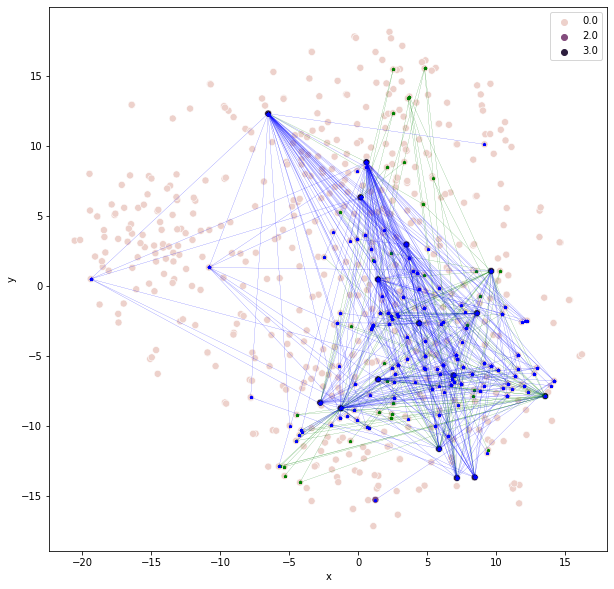

In [89]:
y1 = target_SL
y2 = target_ES

tsne = TSNE(
    perplexity=50,
    n_iter=500,
    metric="euclidean",
    # callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
)

embedding = tsne.fit_transform(x)

df_SL = pd.DataFrame(embedding,columns=['x','y'])
df_ES = pd.DataFrame(embedding,columns=['x','y'])
df_SL["label"] = y1
df_ES["label"] = y2

print()

ax = plt.figure(figsize=(10,10))
sns.scatterplot(x="x", y="y", data=df_SL, hue= "label",s=50)
for i in range(len(interaction_SL_suppliers)):
    a_xloc = df_SL.loc[interaction_SL_suppliers[i][0],'x']
    a_yloc = df_SL.loc[interaction_SL_suppliers[i][0],'y']
    b_xloc = df_SL.loc[interaction_SL_suppliers[i][1],'x']
    b_yloc = df_SL.loc[interaction_SL_suppliers[i][1],'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='green',linestyle='-',linewidth=0.15,marker='*',markersize=3)
for i in range(len(interaction_SL_consumers)):
    a_xloc = df_SL.loc[interaction_SL_consumers[i][0],'x']
    a_yloc = df_SL.loc[interaction_SL_consumers[i][0],'y']
    b_xloc = df_SL.loc[interaction_SL_consumers[i][1],'x']
    b_yloc = df_SL.loc[interaction_SL_consumers[i][1],'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='blue',linestyle='-',linewidth=0.15,marker='*',markersize=3)
plt.legend()
plt.savefig("SL_interaction.png")
plt.show()

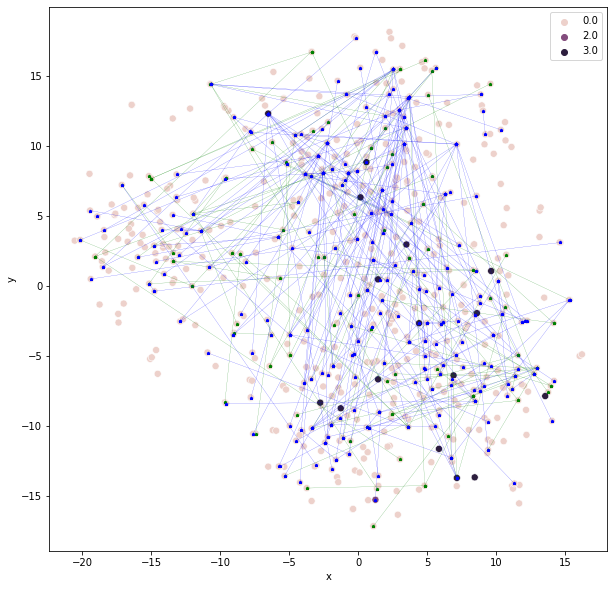

In [90]:
ax = plt.figure(figsize=(10,10))
sns.scatterplot(x="x", y="y", data=df_SL, hue= "label",s=50)
for i in range(len(interaction_ES_suppliers)):
    a_xloc = df_SL.loc[interaction_ES_suppliers[i][0],'x']
    a_yloc = df_SL.loc[interaction_ES_suppliers[i][0],'y']
    b_xloc = df_SL.loc[interaction_ES_suppliers[i][1],'x']
    b_yloc = df_SL.loc[interaction_ES_suppliers[i][1],'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='green',linestyle='-',linewidth=0.15,marker='*',markersize=3)
for i in range(len(interaction_ES_consumers)):
    a_xloc = df_SL.loc[interaction_ES_consumers[i][0],'x']
    a_yloc = df_SL.loc[interaction_ES_consumers[i][0],'y']
    b_xloc = df_SL.loc[interaction_ES_consumers[i][1],'x']
    b_yloc = df_SL.loc[interaction_ES_consumers[i][1],'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='blue',linestyle='-',linewidth=0.15,marker='*',markersize=3)
plt.legend()
plt.savefig("ES_interaction.png")
plt.show()

# Inference Model Implementation and Evaluation

In [116]:
# Data Handling
# ReadJSON
import ntpath
import numpy as np
import copy
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import multiprocessing
from functools import partial
import traceback
import os
import csv
import json

with open('IWSC_Embeddings.json', encoding='utf8') as json_file:
    data = json.load(json_file)
if isinstance(data, list):
    print(f"FOUND {len(data)} ITEMS")

FOUND 630 ITEMS


### Explict Evaluation (With Apparently Labelled Data)

In [17]:
# Semantic Distance: 1-cosine similarity
items = data
embeddings = [item['embedding'] for item in items]
distances = metrics.pairwise.cosine_distances(embeddings, embeddings)

for i in range(0, len(items)):
    pairs = [(d, item['id']) for d, item in zip(distances[i], items)]
    del pairs[i]  # delete distance to self
    items[i]['distances'] = sorted(pairs, key=lambda x: x[0])
print(len(items[0]['distances']))

# Evaluation Target Setting
relation_pos = 'SL_consumers'
relation_neg = 'SL_not_consumers'

# Arrange Labelled Items
labelled = []
for item in items:
    if all(k in item and item[k] for k in [relation_pos, relation_neg]):
        labelled.append(item)
print(f'\nFOUND {len(labelled)} LABELLED ITEMS\n')
dsname = ntpath.basename('IWSC_Embeddings.json')

L1 = 5
L2 = 10
all_scores = [] # Prediction Score
all_GT = [] # Ground Truth lables (0,1)
all_PR = [] # Predicted labels (0 or 1)

# Evaluation (Find Collection of Reasonable Routes,Transform to Scored Target List)
for selected in range(0, len(labelled)):
    query = labelled[selected]

    # Only rank items which the query has a known label for
    tests_pos = query[relation_pos]
    tests_neg = query[relation_neg]
    allowed_target_ids = tests_pos + tests_neg
    
    # Remove the query from the dataset
    safe_items = items.copy()
    safe_items.remove(query)

    # Strip all labels from the query
    safe_query = copy.deepcopy(query)
    safe_query[relation_pos] = []
    
    # Rank: Targets by Distance from the Input to Target Passing (TSR Inference)
    H = safe_query
    collection = []
    labelled_items = [item for item in safe_items if all(k in item and item[k] for k in [relation_pos])]
    labelled_ids = [item['id'] for item in labelled_items]
    
    # TSR
    # L1(Amount) labelled items most similar to H For Each Item in S
    S = [row for row in H['distances'] if row[1] in labelled_ids] 
    if(L1):
        S = S[:L1]   
    for D1, Si_id in S:
        Si = next((item for item in labelled_items if item["id"] == Si_id), None)
        if Si is None:
            continue 
        R = Si[relation_pos] # Each Ri related to Si
        for Ri_id in R:
            Ri = next((item for item in safe_items if item["id"] == Ri_id), None)
            if Ri is None:
                continue
                # Add to output related Node, Distance Score is from H to Si
            if(Ri_id in allowed_target_ids):
                match = { 'target_node': Ri, 'similar_node': Si, 'related_node': Ri, 'distance': D1}
                collection.append(match)
                
            # L2(Amount) items most similar to Ri (that are allowed targets) For Each Item in T
            T = [Ti for Ti in Ri['distances'] if Ti[1] in allowed_target_ids]
            if(L2):
                T = T[:L2]
            for D2, Ti_id in T:
                Ti = next((item for item in safe_items if item["id"] == Ti_id), None)
                if Ti is None:
                    continue
                # Add to output target Node, Total Distance is the sum of H to Si and Ri to Ti
                match = { 'target_node': Ti, 'similar_node': Si, 'related_node': Ri, 'distance': D1+D2}
                collection.append(match)

    # Tansform Collection to Listed Targets
    outputs = []
    rangeFit = True
    for value in collection:  # Group Routes by Target Node
        tID = value
        target = next((item for item in outputs if item['target_id'] == tID), None)
        if not target:                                          # Add target entry if this is it's first route
            outputs.append({'target_id': tID,'routes': [value]})
        else:                             # Otherwise add it to the routes list for the target
            target['routes'].append(value)
    for target in outputs:
        target['routes'] = sorted(target['routes'], key=lambda k: k['distance'])  # Arrange routes shortest first
        target['distance'] = target['routes'][0]['distance']   # Find shortest distance
        # Determine score for each target: Sort by shortest distance (not range fitted)
        target['score'] = 1 - target['distance']/2
       
    # Results in descending order of score
    ranked = sorted(outputs, key=lambda k: -k['score'])
    # Rank threshold for R-Precision
    threshold = len(tests_pos)  
    # Default if item not in results
    worstRank = len(allowed_target_ids) - 1 
    # Exacting Available Item IDs
    ranked_ids = [item['target_id']['target_node']['id'] for item in ranked]

    # Check ranks of positive labels
    for id in tests_pos:

        # Add to Ground Truth
        all_GT.append(1)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

    # Check ranks of negative labels
    for id in tests_neg:

        # Add to Ground Truth
        all_GT.append(0)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

# print(all_GT)
# print(all_PR)
# print(all_scores)

    print(f'EVALUATED QUERY: {str(safe_query["id"]).ljust(5)}')

np.set_printoptions(precision=4)

r = { 'text': '',
      'dataset': dsname,
      'positive_label_name': relation_pos,
      'negative_label_name': relation_neg,
      'labelled_items_count': len(labelled),
      'positive_label_count': all_GT.count(1),
      'negative_label_count': all_GT.count(0),
      'scoring_mode': mode,
      'L1': L1,
      'L2': L2
}

r['text'] += f'\
FOR {r["labelled_items_count"]} ITEMS \
WITH {r["positive_label_count"]} POSITIVE "{r["positive_label_name"]}" LABELS \
AND {r["negative_label_count"]} NEGATIVE "{r["negative_label_name"]}" LABELS:'

r['text'] += f'\nSCORING MODE: {r["scoring_mode"]} L1={r["L1"]} L2={r["L2"]}'

# Chosen threshold
r['text'] += f'\n\nEVALUATED @R (Threshold = len(pos) per item):'

r['P@R'], r['R@R'], r['F1@R'], S = metrics.precision_recall_fscore_support(all_GT, all_PR, average='binary')
r['text'] += f"\n\
PRECISION@R: {r['P@R']:1.4f}\n\
RECALL@R   : {r['R@R']:1.4f}\n\
F1@R       : {r['F1@R']:1.4f}"

r['TN@R'], r['FP@R'], r['FN@R'], r['TP@R'] = metrics.confusion_matrix(all_GT, all_PR).ravel()
r['text'] += f"\n\
CONFUSION MATRIX@R:\n\
    TP:{r['TP@R']} FP:{r['FP@R']}\n\
    FN:{r['FN@R']} TN:{r['TN@R']}"

# No chosen threshold
r['text'] += f'\n\nEVALUATED BY SCORE:'

r['RMS_error'] = metrics.mean_squared_log_error(all_GT, all_scores)
r['text'] += f'\n\
RMS ERROR: {r["RMS_error"]:1.4f}'

r['median_abs_error'] = metrics.median_absolute_error(all_GT, all_scores)
r['text'] += f'\n\
MEDIAN ABSOLUTE ERROR: {r["median_abs_error"]:1.4f}'

print('\n' + r['text'])

629

FOUND 16 LABELLED ITEMS

EVALUATED QUERY: 323  
EVALUATED QUERY: 391  
EVALUATED QUERY: 398  
EVALUATED QUERY: 419  
EVALUATED QUERY: 424  
EVALUATED QUERY: 439  
EVALUATED QUERY: 441  
EVALUATED QUERY: 478  
EVALUATED QUERY: 482  
EVALUATED QUERY: 505  
EVALUATED QUERY: 528  
EVALUATED QUERY: 529  
EVALUATED QUERY: 545  
EVALUATED QUERY: 593  
EVALUATED QUERY: 594  
EVALUATED QUERY: 615  

FOR 16 ITEMS WITH 375 POSITIVE "SL_consumers" LABELS AND 712 NEGATIVE "SL_not_consumers" LABELS:
SCORING MODE: a L1=5 L2=10

EVALUATED @R (Threshold = len(pos) per item):
PRECISION@R: 0.5142
RECALL@R   : 0.4347
F1@R       : 0.4711
CONFUSION MATRIX@R:
    TP:163 FP:154
    FN:212 TN:558

EVALUATED BY SCORE:
RMS ERROR: 0.2040
MEDIAN ABSOLUTE ERROR: 0.6884


In [18]:
# Semantic Distance: 1-cosine similarity
items = data
embeddings = [item['embedding'] for item in items]
distances = metrics.pairwise.cosine_distances(embeddings, embeddings)

for i in range(0, len(items)):
    pairs = [(d, item['id']) for d, item in zip(distances[i], items)]
    del pairs[i]  # delete distance to self
    items[i]['distances'] = sorted(pairs, key=lambda x: x[0])
print(len(items[0]['distances']))

# Evaluation Target Setting
relation_pos = 'SL_suppliers'
relation_neg = 'SL_not_suppliers'

# Arrange Labelled Items
labelled = []
for item in items:
    if all(k in item and item[k] for k in [relation_pos, relation_neg]):
        labelled.append(item)
print(f'\nFOUND {len(labelled)} LABELLED ITEMS\n')
dsname = ntpath.basename('IWSC_Embeddings.json')

L1 = 5
L2 = 10
all_scores = [] # Prediction Score
all_GT = [] # Ground Truth lables (0,1)
all_PR = [] # Predicted labels (0 or 1)

# Evaluation (Find Collection of Reasonable Routes,Transform to Scored Target List)
for selected in range(0, len(labelled)):
    query = labelled[selected]

    # Only rank items which the query has a known label for
    tests_pos = query[relation_pos]
    tests_neg = query[relation_neg]
    allowed_target_ids = tests_pos + tests_neg
    
    # Remove the query from the dataset
    safe_items = items.copy()
    safe_items.remove(query)

    # Strip all labels from the query
    safe_query = copy.deepcopy(query)
    safe_query[relation_pos] = []
    
    # Rank: Targets by Distance from the Input to Target Passing (TSR Inference)
    H = safe_query
    collection = []
    labelled_items = [item for item in safe_items if all(k in item and item[k] for k in [relation_pos])]
    labelled_ids = [item['id'] for item in labelled_items]
    
    # TSR
    # L1(Amount) labelled items most similar to H For Each Item in S
    S = [row for row in H['distances'] if row[1] in labelled_ids] 
    if(L1):
        S = S[:L1]   
    for D1, Si_id in S:
        Si = next((item for item in labelled_items if item["id"] == Si_id), None)
        if Si is None:
            continue 
        R = Si[relation_pos] # Each Ri related to Si
        for Ri_id in R:
            Ri = next((item for item in safe_items if item["id"] == Ri_id), None)
            if Ri is None:
                continue
                # Add to output related Node, Distance Score is from H to Si
            if(Ri_id in allowed_target_ids):
                match = { 'target_node': Ri, 'similar_node': Si, 'related_node': Ri, 'distance': D1}
                collection.append(match)
                
            # L2(Amount) items most similar to Ri (that are allowed targets) For Each Item in T
            T = [Ti for Ti in Ri['distances'] if Ti[1] in allowed_target_ids]
            if(L2):
                T = T[:L2]
            for D2, Ti_id in T:
                Ti = next((item for item in safe_items if item["id"] == Ti_id), None)
                if Ti is None:
                    continue
                # Add to output target Node, Total Distance is the sum of H to Si and Ri to Ti
                match = { 'target_node': Ti, 'similar_node': Si, 'related_node': Ri, 'distance': D1+D2}
                collection.append(match)

    # Tansform Collection to Listed Targets
    outputs = []
    rangeFit = True
    for value in collection:  # Group Routes by Target Node
        tID = value
        target = next((item for item in outputs if item['target_id'] == tID), None)
        if not target:                                          # Add target entry if this is it's first route
            outputs.append({'target_id': tID,'routes': [value]})
        else:                             # Otherwise add it to the routes list for the target
            target['routes'].append(value)
    for target in outputs:
        target['routes'] = sorted(target['routes'], key=lambda k: k['distance'])  # Arrange routes shortest first
        target['distance'] = target['routes'][0]['distance']   # Find shortest distance
        # Determine score for each target: Sort by shortest distance (not range fitted)
        target['score'] = 1 - target['distance']/2
       
    # Results in descending order of score
    ranked = sorted(outputs, key=lambda k: -k['score'])
    # Rank threshold for R-Precision
    threshold = len(tests_pos)  
    # Default if item not in results
    worstRank = len(allowed_target_ids) - 1 
    # Exacting Available Item IDs
    ranked_ids = [item['target_id']['target_node']['id'] for item in ranked]

    # Check ranks of positive labels
    for id in tests_pos:

        # Add to Ground Truth
        all_GT.append(1)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

    # Check ranks of negative labels
    for id in tests_neg:

        # Add to Ground Truth
        all_GT.append(0)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

# print(all_GT)
# print(all_PR)
# print(all_scores)

    print(f'EVALUATED QUERY: {str(safe_query["id"]).ljust(5)}')

np.set_printoptions(precision=4)

r = { 'text': '',
      'dataset': dsname,
      'positive_label_name': relation_pos,
      'negative_label_name': relation_neg,
      'labelled_items_count': len(labelled),
      'positive_label_count': all_GT.count(1),
      'negative_label_count': all_GT.count(0),
      'scoring_mode': mode,
      'L1': L1,
      'L2': L2
}

r['text'] += f'\
FOR {r["labelled_items_count"]} ITEMS \
WITH {r["positive_label_count"]} POSITIVE "{r["positive_label_name"]}" LABELS \
AND {r["negative_label_count"]} NEGATIVE "{r["negative_label_name"]}" LABELS:'

r['text'] += f'\nSCORING MODE: {r["scoring_mode"]} L1={r["L1"]} L2={r["L2"]}'

# Chosen threshold
r['text'] += f'\n\nEVALUATED @R (Threshold = len(pos) per item):'

r['P@R'], r['R@R'], r['F1@R'], S = metrics.precision_recall_fscore_support(all_GT, all_PR, average='binary')
r['text'] += f"\n\
PRECISION@R: {r['P@R']:1.4f}\n\
RECALL@R   : {r['R@R']:1.4f}\n\
F1@R       : {r['F1@R']:1.4f}"

r['TN@R'], r['FP@R'], r['FN@R'], r['TP@R'] = metrics.confusion_matrix(all_GT, all_PR).ravel()
r['text'] += f"\n\
CONFUSION MATRIX@R:\n\
    TP:{r['TP@R']} FP:{r['FP@R']}\n\
    FN:{r['FN@R']} TN:{r['TN@R']}"

# No chosen threshold
r['text'] += f'\n\nEVALUATED BY SCORE:'

r['RMS_error'] = metrics.mean_squared_log_error(all_GT, all_scores)
r['text'] += f'\n\
RMS ERROR: {r["RMS_error"]:1.4f}'

r['median_abs_error'] = metrics.median_absolute_error(all_GT, all_scores)
r['text'] += f'\n\
MEDIAN ABSOLUTE ERROR: {r["median_abs_error"]:1.4f}'

print('\n' + r['text'])

629

FOUND 15 LABELLED ITEMS

EVALUATED QUERY: 323  
EVALUATED QUERY: 391  
EVALUATED QUERY: 398  
EVALUATED QUERY: 419  
EVALUATED QUERY: 424  
EVALUATED QUERY: 439  
EVALUATED QUERY: 441  
EVALUATED QUERY: 478  
EVALUATED QUERY: 482  
EVALUATED QUERY: 505  
EVALUATED QUERY: 528  
EVALUATED QUERY: 529  
EVALUATED QUERY: 545  
EVALUATED QUERY: 593  
EVALUATED QUERY: 615  

FOR 15 ITEMS WITH 142 POSITIVE "SL_suppliers" LABELS AND 525 NEGATIVE "SL_not_suppliers" LABELS:
SCORING MODE: a L1=5 L2=10

EVALUATED @R (Threshold = len(pos) per item):
PRECISION@R: 0.4553
RECALL@R   : 0.3944
F1@R       : 0.4226
CONFUSION MATRIX@R:
    TP:56 FP:67
    FN:86 TN:458

EVALUATED BY SCORE:
RMS ERROR: 0.2337
MEDIAN ABSOLUTE ERROR: 0.6824


In [20]:
# Semantic Distance: 1-cosine similarity
items = data
embeddings = [item['embedding'] for item in items]
distances = metrics.pairwise.cosine_distances(embeddings, embeddings)

for i in range(0, len(items)):
    pairs = [(d, item['id']) for d, item in zip(distances[i], items)]
    del pairs[i]  # delete distance to self
    items[i]['distances'] = sorted(pairs, key=lambda x: x[0])
print(len(items[0]['distances']))

# Evaluation Target Setting
relation_pos = 'ES_consumers'
relation_neg = 'ES_unrelated'

# Arrange Labelled Items
labelled = []
for item in items:
    if all(k in item and item[k] for k in [relation_pos, relation_neg]):
        labelled.append(item)
print(f'\nFOUND {len(labelled)} LABELLED ITEMS\n')
dsname = ntpath.basename('IWSC_Embeddings.json')

L1 = 5
L2 = 10
all_scores = [] # Prediction Score
all_GT = [] # Ground Truth lables (0,1)
all_PR = [] # Predicted labels (0 or 1)

# Evaluation (Find Collection of Reasonable Routes,Transform to Scored Target List)
for selected in range(0, len(labelled)):
    query = labelled[selected]

    # Only rank items which the query has a known label for
    tests_pos = query[relation_pos]
    tests_neg = query[relation_neg]
    allowed_target_ids = tests_pos + tests_neg
    
    # Remove the query from the dataset
    safe_items = items.copy()
    safe_items.remove(query)

    # Strip all labels from the query
    safe_query = copy.deepcopy(query)
    safe_query[relation_pos] = []
    
    # Rank: Targets by Distance from the Input to Target Passing (TSR Inference)
    H = safe_query
    collection = []
    labelled_items = [item for item in safe_items if all(k in item and item[k] for k in [relation_pos])]
    labelled_ids = [item['id'] for item in labelled_items]
    
    # TSR
    # L1(Amount) labelled items most similar to H For Each Item in S
    S = [row for row in H['distances'] if row[1] in labelled_ids] 
    if(L1):
        S = S[:L1]   
    for D1, Si_id in S:
        Si = next((item for item in labelled_items if item["id"] == Si_id), None)
        if Si is None:
            continue 
        R = Si[relation_pos] # Each Ri related to Si
        for Ri_id in R:
            Ri = next((item for item in safe_items if item["id"] == Ri_id), None)
            if Ri is None:
                continue
                # Add to output related Node, Distance Score is from H to Si
            if(Ri_id in allowed_target_ids):
                match = { 'target_node': Ri, 'similar_node': Si, 'related_node': Ri, 'distance': D1}
                collection.append(match)
                
            # L2(Amount) items most similar to Ri (that are allowed targets) For Each Item in T
            T = [Ti for Ti in Ri['distances'] if Ti[1] in allowed_target_ids]
            if(L2):
                T = T[:L2]
            for D2, Ti_id in T:
                Ti = next((item for item in safe_items if item["id"] == Ti_id), None)
                if Ti is None:
                    continue
                # Add to output target Node, Total Distance is the sum of H to Si and Ri to Ti
                match = { 'target_node': Ti, 'similar_node': Si, 'related_node': Ri, 'distance': D1+D2}
                collection.append(match)

    # Tansform Collection to Listed Targets
    outputs = []
    rangeFit = True
    for value in collection:  # Group Routes by Target Node
        tID = value
        target = next((item for item in outputs if item['target_id'] == tID), None)
        if not target:                                          # Add target entry if this is it's first route
            outputs.append({'target_id': tID,'routes': [value]})
        else:                             # Otherwise add it to the routes list for the target
            target['routes'].append(value)
    for target in outputs:
        target['routes'] = sorted(target['routes'], key=lambda k: k['distance'])  # Arrange routes shortest first
        target['distance'] = target['routes'][0]['distance']   # Find shortest distance
        # Determine score for each target: Sort by shortest distance (not range fitted)
        target['score'] = 1 - target['distance']/2
       
    # Results in descending order of score
    ranked = sorted(outputs, key=lambda k: -k['score'])
    # Rank threshold for R-Precision
    threshold = len(tests_pos)  
    # Default if item not in results
    worstRank = len(allowed_target_ids) - 1 
    # Exacting Available Item IDs
    ranked_ids = [item['target_id']['target_node']['id'] for item in ranked]

    # Check ranks of positive labels
    for id in tests_pos:

        # Add to Ground Truth
        all_GT.append(1)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

    # Check ranks of negative labels
    for id in tests_neg:

        # Add to Ground Truth
        all_GT.append(0)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

# print(all_GT)
# print(all_PR)
# print(all_scores)

    print(f'EVALUATED QUERY: {str(safe_query["id"]).ljust(5)}')

np.set_printoptions(precision=4)

r = { 'text': '',
      'dataset': dsname,
      'positive_label_name': relation_pos,
      'negative_label_name': relation_neg,
      'labelled_items_count': len(labelled),
      'positive_label_count': all_GT.count(1),
      'negative_label_count': all_GT.count(0),
      'scoring_mode': mode,
      'L1': L1,
      'L2': L2
}

r['text'] += f'\
FOR {r["labelled_items_count"]} ITEMS \
WITH {r["positive_label_count"]} POSITIVE "{r["positive_label_name"]}" LABELS \
AND {r["negative_label_count"]} NEGATIVE "{r["negative_label_name"]}" LABELS:'

r['text'] += f'\nSCORING MODE: {r["scoring_mode"]} L1={r["L1"]} L2={r["L2"]}'

# Chosen threshold
r['text'] += f'\n\nEVALUATED @R (Threshold = len(pos) per item):'

r['P@R'], r['R@R'], r['F1@R'], S = metrics.precision_recall_fscore_support(all_GT, all_PR, average='binary')
r['text'] += f"\n\
PRECISION@R: {r['P@R']:1.4f}\n\
RECALL@R   : {r['R@R']:1.4f}\n\
F1@R       : {r['F1@R']:1.4f}"

r['TN@R'], r['FP@R'], r['FN@R'], r['TP@R'] = metrics.confusion_matrix(all_GT, all_PR).ravel()
r['text'] += f"\n\
CONFUSION MATRIX@R:\n\
    TP:{r['TP@R']} FP:{r['FP@R']}\n\
    FN:{r['FN@R']} TN:{r['TN@R']}"

# No chosen threshold
r['text'] += f'\n\nEVALUATED BY SCORE:'

r['RMS_error'] = metrics.mean_squared_log_error(all_GT, all_scores)
r['text'] += f'\n\
RMS ERROR: {r["RMS_error"]:1.4f}'

r['median_abs_error'] = metrics.median_absolute_error(all_GT, all_scores)
r['text'] += f'\n\
MEDIAN ABSOLUTE ERROR: {r["median_abs_error"]:1.4f}'

print('\n' + r['text'])

629

FOUND 38 LABELLED ITEMS

EVALUATED QUERY: 5    
EVALUATED QUERY: 17   
EVALUATED QUERY: 49   
EVALUATED QUERY: 50   
EVALUATED QUERY: 131  
EVALUATED QUERY: 133  
EVALUATED QUERY: 167  
EVALUATED QUERY: 172  
EVALUATED QUERY: 182  
EVALUATED QUERY: 226  
EVALUATED QUERY: 247  
EVALUATED QUERY: 252  
EVALUATED QUERY: 256  
EVALUATED QUERY: 257  
EVALUATED QUERY: 261  
EVALUATED QUERY: 265  
EVALUATED QUERY: 273  
EVALUATED QUERY: 302  
EVALUATED QUERY: 320  
EVALUATED QUERY: 356  
EVALUATED QUERY: 360  
EVALUATED QUERY: 377  
EVALUATED QUERY: 405  
EVALUATED QUERY: 473  
EVALUATED QUERY: 489  
EVALUATED QUERY: 528  
EVALUATED QUERY: 532  
EVALUATED QUERY: 536  
EVALUATED QUERY: 543  
EVALUATED QUERY: 546  
EVALUATED QUERY: 550  
EVALUATED QUERY: 555  
EVALUATED QUERY: 566  
EVALUATED QUERY: 567  
EVALUATED QUERY: 579  
EVALUATED QUERY: 584  
EVALUATED QUERY: 598  
EVALUATED QUERY: 611  

FOR 38 ITEMS WITH 114 POSITIVE "ES_consumers" LABELS AND 194 NEGATIVE "ES_unrelated" LABELS:
SC

In [21]:
# Semantic Distance: 1-cosine similarity
items = data
embeddings = [item['embedding'] for item in items]
distances = metrics.pairwise.cosine_distances(embeddings, embeddings)

for i in range(0, len(items)):
    pairs = [(d, item['id']) for d, item in zip(distances[i], items)]
    del pairs[i]  # delete distance to self
    items[i]['distances'] = sorted(pairs, key=lambda x: x[0])
print(len(items[0]['distances']))

# Evaluation Target Setting
relation_pos = 'ES_suppliers'
relation_neg = 'ES_unrelated'

# Arrange Labelled Items
labelled = []
for item in items:
    if all(k in item and item[k] for k in [relation_pos, relation_neg]):
        labelled.append(item)
print(f'\nFOUND {len(labelled)} LABELLED ITEMS\n')
dsname = ntpath.basename('IWSC_Embeddings.json')

L1 = 5
L2 = 10
all_scores = [] # Prediction Score
all_GT = [] # Ground Truth lables (0,1)
all_PR = [] # Predicted labels (0 or 1)

# Evaluation (Find Collection of Reasonable Routes,Transform to Scored Target List)
for selected in range(0, len(labelled)):
    query = labelled[selected]

    # Only rank items which the query has a known label for
    tests_pos = query[relation_pos]
    tests_neg = query[relation_neg]
    allowed_target_ids = tests_pos + tests_neg
    
    # Remove the query from the dataset
    safe_items = items.copy()
    safe_items.remove(query)

    # Strip all labels from the query
    safe_query = copy.deepcopy(query)
    safe_query[relation_pos] = []
    
    # Rank: Targets by Distance from the Input to Target Passing (TSR Inference)
    H = safe_query
    collection = []
    labelled_items = [item for item in safe_items if all(k in item and item[k] for k in [relation_pos])]
    labelled_ids = [item['id'] for item in labelled_items]
    
    # TSR
    # L1(Amount) labelled items most similar to H For Each Item in S
    S = [row for row in H['distances'] if row[1] in labelled_ids] 
    if(L1):
        S = S[:L1]   
    for D1, Si_id in S:
        Si = next((item for item in labelled_items if item["id"] == Si_id), None)
        if Si is None:
            continue 
        R = Si[relation_pos] # Each Ri related to Si
        for Ri_id in R:
            Ri = next((item for item in safe_items if item["id"] == Ri_id), None)
            if Ri is None:
                continue
                # Add to output related Node, Distance Score is from H to Si
            if(Ri_id in allowed_target_ids):
                match = { 'target_node': Ri, 'similar_node': Si, 'related_node': Ri, 'distance': D1}
                collection.append(match)
                
            # L2(Amount) items most similar to Ri (that are allowed targets) For Each Item in T
            T = [Ti for Ti in Ri['distances'] if Ti[1] in allowed_target_ids]
            if(L2):
                T = T[:L2]
            for D2, Ti_id in T:
                Ti = next((item for item in safe_items if item["id"] == Ti_id), None)
                if Ti is None:
                    continue
                # Add to output target Node, Total Distance is the sum of H to Si and Ri to Ti
                match = { 'target_node': Ti, 'similar_node': Si, 'related_node': Ri, 'distance': D1+D2}
                collection.append(match)

    # Tansform Collection to Listed Targets
    outputs = []
    rangeFit = True
    for value in collection:  # Group Routes by Target Node
        tID = value
        target = next((item for item in outputs if item['target_id'] == tID), None)
        if not target:                                          # Add target entry if this is it's first route
            outputs.append({'target_id': tID,'routes': [value]})
        else:                             # Otherwise add it to the routes list for the target
            target['routes'].append(value)
    for target in outputs:
        target['routes'] = sorted(target['routes'], key=lambda k: k['distance'])  # Arrange routes shortest first
        target['distance'] = target['routes'][0]['distance']   # Find shortest distance
        # Determine score for each target: Sort by shortest distance (not range fitted)
        target['score'] = 1 - target['distance']/2
       
    # Results in descending order of score
    ranked = sorted(outputs, key=lambda k: -k['score'])
    # Rank threshold for R-Precision
    threshold = len(tests_pos)  
    # Default if item not in results
    worstRank = len(allowed_target_ids) - 1 
    # Exacting Available Item IDs
    ranked_ids = [item['target_id']['target_node']['id'] for item in ranked]

    # Check ranks of positive labels
    for id in tests_pos:

        # Add to Ground Truth
        all_GT.append(1)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

    # Check ranks of negative labels
    for id in tests_neg:

        # Add to Ground Truth
        all_GT.append(0)

        # Record label based on rank threshold
        rank = ranked_ids.index(id) if id in ranked_ids else worstRank
        all_PR.append(1 if rank < threshold else 0)

        # Record score
        score = ranked[rank]['score'] if id in ranked_ids else 0
        all_scores.append(score)

# print(all_GT)
# print(all_PR)
# print(all_scores)

    print(f'EVALUATED QUERY: {str(safe_query["id"]).ljust(5)}')

np.set_printoptions(precision=4)

r = { 'text': '',
      'dataset': dsname,
      'positive_label_name': relation_pos,
      'negative_label_name': relation_neg,
      'labelled_items_count': len(labelled),
      'positive_label_count': all_GT.count(1),
      'negative_label_count': all_GT.count(0),
      'scoring_mode': mode,
      'L1': L1,
      'L2': L2
}

r['text'] += f'\
FOR {r["labelled_items_count"]} ITEMS \
WITH {r["positive_label_count"]} POSITIVE "{r["positive_label_name"]}" LABELS \
AND {r["negative_label_count"]} NEGATIVE "{r["negative_label_name"]}" LABELS:'

r['text'] += f'\nSCORING MODE: {r["scoring_mode"]} L1={r["L1"]} L2={r["L2"]}'

# Chosen threshold
r['text'] += f'\n\nEVALUATED @R (Threshold = len(pos) per item):'

r['P@R'], r['R@R'], r['F1@R'], S = metrics.precision_recall_fscore_support(all_GT, all_PR, average='binary')
r['text'] += f"\n\
PRECISION@R: {r['P@R']:1.4f}\n\
RECALL@R   : {r['R@R']:1.4f}\n\
F1@R       : {r['F1@R']:1.4f}"

r['TN@R'], r['FP@R'], r['FN@R'], r['TP@R'] = metrics.confusion_matrix(all_GT, all_PR).ravel()
r['text'] += f"\n\
CONFUSION MATRIX@R:\n\
    TP:{r['TP@R']} FP:{r['FP@R']}\n\
    FN:{r['FN@R']} TN:{r['TN@R']}"

# No chosen threshold
r['text'] += f'\n\nEVALUATED BY SCORE:'

r['RMS_error'] = metrics.mean_squared_log_error(all_GT, all_scores)
r['text'] += f'\n\
RMS ERROR: {r["RMS_error"]:1.4f}'

r['median_abs_error'] = metrics.median_absolute_error(all_GT, all_scores)
r['text'] += f'\n\
MEDIAN ABSOLUTE ERROR: {r["median_abs_error"]:1.4f}'

print('\n' + r['text'])

629

FOUND 46 LABELLED ITEMS

EVALUATED QUERY: 1    
EVALUATED QUERY: 2    
EVALUATED QUERY: 5    
EVALUATED QUERY: 39   
EVALUATED QUERY: 47   
EVALUATED QUERY: 63   
EVALUATED QUERY: 65   
EVALUATED QUERY: 66   
EVALUATED QUERY: 77   
EVALUATED QUERY: 81   
EVALUATED QUERY: 112  
EVALUATED QUERY: 133  
EVALUATED QUERY: 139  
EVALUATED QUERY: 163  
EVALUATED QUERY: 167  
EVALUATED QUERY: 172  
EVALUATED QUERY: 184  
EVALUATED QUERY: 187  
EVALUATED QUERY: 210  
EVALUATED QUERY: 223  
EVALUATED QUERY: 230  
EVALUATED QUERY: 247  
EVALUATED QUERY: 248  
EVALUATED QUERY: 256  
EVALUATED QUERY: 265  
EVALUATED QUERY: 273  
EVALUATED QUERY: 356  
EVALUATED QUERY: 357  
EVALUATED QUERY: 363  
EVALUATED QUERY: 377  
EVALUATED QUERY: 383  
EVALUATED QUERY: 405  
EVALUATED QUERY: 469  
EVALUATED QUERY: 513  
EVALUATED QUERY: 515  
EVALUATED QUERY: 528  
EVALUATED QUERY: 532  
EVALUATED QUERY: 536  
EVALUATED QUERY: 543  
EVALUATED QUERY: 544  
EVALUATED QUERY: 546  
EVALUATED QUERY: 550  
EVAL

### Implict Evaluation (With Potential Relationships)

In [43]:
# Semantic Distance: 1-cosine similarity
items = data
embeddings = [item['embedding'] for item in items]
distances = metrics.pairwise.cosine_distances(embeddings, embeddings)

for i in range(0, len(items)):
    pairs = [(d, item['id']) for d, item in zip(distances[i], items)]
    del pairs[i]  # delete distance to self
    items[i]['distances'] = sorted(pairs, key=lambda x: x[0])
print(len(items[0]['distances']))

# Evaluation Target Setting
attempts = 10
relation_pos = 'SL_consumers'

# Arrange Labelled Items
labelled = []
for item in items:
    if all(k in item and item[k] for k in [relation_pos]):
        labelled.append(item)
print(f'\nFOUND {len(labelled)} LABELLED ITEMS\n')
dsname = ntpath.basename('IWSC_Embeddings.json')

# Cold Star Scenario Construction: 100 randomly unknown Items with 1 known positive Item
L1 = 5
L2 = 10
cases = []
volume = 101
results = []
for labelled_item in labelled:
    for pos in labelled_item[relation_pos]:
        for i in range(1,attempts+1):
            target_ids = [t['id'] for t in items if t['id'] not in labelled_item[relation_pos]] # 100 random non-positive Items
            np.random.shuffle(target_ids)
            target_ids = target_ids[:volume-1]
            
            target_ids.append(pos)       # Add 1 positive sample
            np.random.shuffle(target_ids)
            
            cases.append({"query": labelled_item,"pos_id": pos,"target_ids": target_ids,"attempt": i})
# Test Start
i=0
for case in cases:
    pos_id = case["pos_id"]
    query = case["query"]
    allowed_target_ids=case["target_ids"]
    
    # Remove the query from the dataset
    safe_items = items.copy()
    safe_items.remove(query)

    # Strip all labels from the query
    safe_query = copy.deepcopy(query)
    safe_query[relation_pos] = []
    
    # Rank: Targets by Distance from the Input to Target Passing (TSR Inference)
    H = safe_query
    collection = []
    labelled_items = [item for item in safe_items if all(k in item and item[k] for k in [relation_pos])]
    labelled_ids = [item['id'] for item in labelled_items]
    
    # TSR
    # L1(Amount) labelled items most similar to H For Each Item in S
    S = [row for row in H['distances'] if row[1] in labelled_ids] 
    if(L1):
        S = S[:L1]   
    for D1, Si_id in S:
        Si = next((item for item in labelled_items if item["id"] == Si_id), None)
        if Si is None:
            continue 
        R = Si[relation_pos] # Each Ri related to Si
        for Ri_id in R:
            Ri = next((item for item in safe_items if item["id"] == Ri_id), None)
            if Ri is None:
                continue
                # Add to output related Node, Distance Score is from H to Si
            if(Ri_id in allowed_target_ids):
                match = { 'target_node': Ri, 'similar_node': Si, 'related_node': Ri, 'distance': D1}
                collection.append(match)
                
            # L2(Amount) items most similar to Ri (that are allowed targets) For Each Item in T
            T = [Ti for Ti in Ri['distances'] if Ti[1] in allowed_target_ids]
            if(L2):
                T = T[:L2]
            for D2, Ti_id in T:
                Ti = next((item for item in safe_items if item["id"] == Ti_id), None)
                if Ti is None:
                    continue
                # Add to output target Node, Total Distance is the sum of H to Si and Ri to Ti
                match = { 'target_node': Ti, 'similar_node': Si, 'related_node': Ri, 'distance': D1+D2}
                collection.append(match)

    # Tansform Collection to Listed Targets
    outputs = []
    rangeFit = True
    for value in collection:  # Group Routes by Target Node
        tID = value
        target = next((item for item in outputs if item['target_id'] == tID), None)
        if not target:                                          # Add target entry if this is it's first route
            outputs.append({'target_id': tID,'routes': [value]})
        else:                             # Otherwise add it to the routes list for the target
            target['routes'].append(value)
    for target in outputs:
        target['routes'] = sorted(target['routes'], key=lambda k: k['distance'])  # Arrange routes shortest first
        target['distance'] = target['routes'][0]['distance']   # Find shortest distance
        # Determine score for each target: Sort by shortest distance (not range fitted)
        target['score'] = 1 - target['distance']/2
       
    # Results in descending order of score
    ranked = sorted(outputs, key=lambda k: -k['score'])
    
    ranked_ids = [item['target_id']['target_node']['id'] for item in ranked]
    pos_rank = ranked_ids.index(pos_id) if pos_id in ranked_ids else volume
    
    print(f'\
QUERY: {str(safe_query["id"]).ljust(5)} \
TARGET: {str(pos_id).ljust(5)} \
ATTEMPT: {str(case["attempt"]).ljust(5)} \
POSITIVE LABEL RANK: {pos_rank}')
    results.append((pos_id,pos_rank))

all_pos_ranks = [rank for id,rank in results] # Rank Results

per_pos_ranks = {}      # Target-index Results
for id,rank in results:
    if id in per_pos_ranks:
        per_pos_ranks[id].append(rank)
    else:
        per_pos_ranks[id] = [rank]

r = {
    'text': '',
    'dataset': dsname,
    'positive_label_name': relation_pos,
    'labelled_items_count': len(labelled),
    'positive_label_count': int(len(all_pos_ranks)/attempts),
    'evaluation_repeat_count': attempts,
    'scoring_mode': 'a',
    'L1': L1,
    'L2': L2
}

r['positive_label_ranks'] = all_pos_ranks
r['total_evaluations_count'] = len(all_pos_ranks)
r['hits@10'] = len([1 for i in all_pos_ranks if i < 10])
r['HR@10'] = r['hits@10'] / r['total_evaluations_count']
r['hits@5'] = len([1 for i in all_pos_ranks if i < 5])
r['HR@5'] = r['hits@5'] / r['total_evaluations_count']
r['hits@1'] = len([1 for i in all_pos_ranks if i < 1])
r['HR@1'] = r['hits@1'] / r['total_evaluations_count']
r['median_label_positive_rank'] = np.median(all_pos_ranks)
r['mean_label_positive_rank'] = sum(all_pos_ranks)/float(len(all_pos_ranks)) if len(all_pos_ranks) else np.nan

r['text'] += f'\
FOR {r["labelled_items_count"]} ITEMS \
WITH {r["positive_label_count"]} POSITIVE "{r["positive_label_name"]}" LABELS \
EACH RANKED OUT OF {volume-1} RANDOM ITEMS {attempts} TIMES'

r['text'] += f'\nSCORING MODE: {r["scoring_mode"]} L1={r["L1"]} L2={r["L2"]}'

r['text'] += f'\nMEDIAN POSITIVE LABEL RANK: {r["median_label_positive_rank"]}'

r['text'] += f'\nMEAN POSITIVE LABEL RANK: {r["mean_label_positive_rank"]:1.4f}'

r['text'] += f'\nHIT RATE @10: {r["HR@10"]:1.4f}'

r['text'] += f'\nHIT RATE @5:  {r["HR@5"]:1.4f}'

r['text'] += f'\nHIT RATE @1:  {r["HR@1"]:1.4f}'

print('\n' + r['text'])

629

FOUND 17 LABELLED ITEMS

QUERY: 323   TARGET: 481   ATTEMPT: 1     POSITIVE LABEL RANK: 1
QUERY: 323   TARGET: 481   ATTEMPT: 2     POSITIVE LABEL RANK: 2
QUERY: 323   TARGET: 481   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 323   TARGET: 481   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 323   TARGET: 481   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 323   TARGET: 481   ATTEMPT: 6     POSITIVE LABEL RANK: 2
QUERY: 323   TARGET: 481   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 323   TARGET: 481   ATTEMPT: 8     POSITIVE LABEL RANK: 0
QUERY: 323   TARGET: 481   ATTEMPT: 9     POSITIVE LABEL RANK: 0
QUERY: 323   TARGET: 481   ATTEMPT: 10    POSITIVE LABEL RANK: 0
QUERY: 323   TARGET: 464   ATTEMPT: 1     POSITIVE LABEL RANK: 4
QUERY: 323   TARGET: 464   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 323   TARGET: 464   ATTEMPT: 3     POSITIVE LABEL RANK: 4
QUERY: 323   TARGET: 464   ATTEMPT: 4     POSITIVE LABEL RANK: 3
QUERY: 323   TARGET: 464   ATTEMPT: 5     POSITIVE LABEL RAN

QUERY: 323   TARGET: 367   ATTEMPT: 7     POSITIVE LABEL RANK: 4
QUERY: 323   TARGET: 367   ATTEMPT: 8     POSITIVE LABEL RANK: 6
QUERY: 323   TARGET: 367   ATTEMPT: 9     POSITIVE LABEL RANK: 5
QUERY: 323   TARGET: 367   ATTEMPT: 10    POSITIVE LABEL RANK: 6
QUERY: 323   TARGET: 546   ATTEMPT: 1     POSITIVE LABEL RANK: 4
QUERY: 323   TARGET: 546   ATTEMPT: 2     POSITIVE LABEL RANK: 6
QUERY: 323   TARGET: 546   ATTEMPT: 3     POSITIVE LABEL RANK: 3
QUERY: 323   TARGET: 546   ATTEMPT: 4     POSITIVE LABEL RANK: 7
QUERY: 323   TARGET: 546   ATTEMPT: 5     POSITIVE LABEL RANK: 5
QUERY: 323   TARGET: 546   ATTEMPT: 6     POSITIVE LABEL RANK: 3
QUERY: 323   TARGET: 546   ATTEMPT: 7     POSITIVE LABEL RANK: 3
QUERY: 323   TARGET: 546   ATTEMPT: 8     POSITIVE LABEL RANK: 1
QUERY: 323   TARGET: 546   ATTEMPT: 9     POSITIVE LABEL RANK: 6
QUERY: 323   TARGET: 546   ATTEMPT: 10    POSITIVE LABEL RANK: 3
QUERY: 323   TARGET: 496   ATTEMPT: 1     POSITIVE LABEL RANK: 4
QUERY: 323   TARGET: 496 

QUERY: 391   TARGET: 388   ATTEMPT: 4     POSITIVE LABEL RANK: 3
QUERY: 391   TARGET: 388   ATTEMPT: 5     POSITIVE LABEL RANK: 3
QUERY: 391   TARGET: 388   ATTEMPT: 6     POSITIVE LABEL RANK: 2
QUERY: 391   TARGET: 388   ATTEMPT: 7     POSITIVE LABEL RANK: 3
QUERY: 391   TARGET: 388   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 391   TARGET: 388   ATTEMPT: 9     POSITIVE LABEL RANK: 7
QUERY: 391   TARGET: 388   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 391   TARGET: 590   ATTEMPT: 1     POSITIVE LABEL RANK: 14
QUERY: 391   TARGET: 590   ATTEMPT: 2     POSITIVE LABEL RANK: 12
QUERY: 391   TARGET: 590   ATTEMPT: 3     POSITIVE LABEL RANK: 6
QUERY: 391   TARGET: 590   ATTEMPT: 4     POSITIVE LABEL RANK: 7
QUERY: 391   TARGET: 590   ATTEMPT: 5     POSITIVE LABEL RANK: 20
QUERY: 391   TARGET: 590   ATTEMPT: 6     POSITIVE LABEL RANK: 11
QUERY: 391   TARGET: 590   ATTEMPT: 7     POSITIVE LABEL RANK: 11
QUERY: 391   TARGET: 590   ATTEMPT: 8     POSITIVE LABEL RANK: 11
QUERY: 391   TARGET

QUERY: 398   TARGET: 336   ATTEMPT: 10    POSITIVE LABEL RANK: 3
QUERY: 398   TARGET: 583   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 398   TARGET: 583   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 398   TARGET: 583   ATTEMPT: 3     POSITIVE LABEL RANK: 0
QUERY: 398   TARGET: 583   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 398   TARGET: 583   ATTEMPT: 5     POSITIVE LABEL RANK: 1
QUERY: 398   TARGET: 583   ATTEMPT: 6     POSITIVE LABEL RANK: 0
QUERY: 398   TARGET: 583   ATTEMPT: 7     POSITIVE LABEL RANK: 1
QUERY: 398   TARGET: 583   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 398   TARGET: 583   ATTEMPT: 9     POSITIVE LABEL RANK: 1
QUERY: 398   TARGET: 583   ATTEMPT: 10    POSITIVE LABEL RANK: 2
QUERY: 398   TARGET: 339   ATTEMPT: 1     POSITIVE LABEL RANK: 3
QUERY: 398   TARGET: 339   ATTEMPT: 2     POSITIVE LABEL RANK: 2
QUERY: 398   TARGET: 339   ATTEMPT: 3     POSITIVE LABEL RANK: 3
QUERY: 398   TARGET: 339   ATTEMPT: 4     POSITIVE LABEL RANK: 5
QUERY: 398   TARGET: 339 

QUERY: 419   TARGET: 605   ATTEMPT: 6     POSITIVE LABEL RANK: 6
QUERY: 419   TARGET: 605   ATTEMPT: 7     POSITIVE LABEL RANK: 9
QUERY: 419   TARGET: 605   ATTEMPT: 8     POSITIVE LABEL RANK: 4
QUERY: 419   TARGET: 605   ATTEMPT: 9     POSITIVE LABEL RANK: 6
QUERY: 419   TARGET: 605   ATTEMPT: 10    POSITIVE LABEL RANK: 7
QUERY: 419   TARGET: 384   ATTEMPT: 1     POSITIVE LABEL RANK: 9
QUERY: 419   TARGET: 384   ATTEMPT: 2     POSITIVE LABEL RANK: 3
QUERY: 419   TARGET: 384   ATTEMPT: 3     POSITIVE LABEL RANK: 19
QUERY: 419   TARGET: 384   ATTEMPT: 4     POSITIVE LABEL RANK: 8
QUERY: 419   TARGET: 384   ATTEMPT: 5     POSITIVE LABEL RANK: 17
QUERY: 419   TARGET: 384   ATTEMPT: 6     POSITIVE LABEL RANK: 10
QUERY: 419   TARGET: 384   ATTEMPT: 7     POSITIVE LABEL RANK: 8
QUERY: 419   TARGET: 384   ATTEMPT: 8     POSITIVE LABEL RANK: 15
QUERY: 419   TARGET: 384   ATTEMPT: 9     POSITIVE LABEL RANK: 18
QUERY: 419   TARGET: 384   ATTEMPT: 10    POSITIVE LABEL RANK: 9
QUERY: 419   TARGET:

QUERY: 419   TARGET: 612   ATTEMPT: 3     POSITIVE LABEL RANK: 0
QUERY: 419   TARGET: 612   ATTEMPT: 4     POSITIVE LABEL RANK: 1
QUERY: 419   TARGET: 612   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 419   TARGET: 612   ATTEMPT: 6     POSITIVE LABEL RANK: 4
QUERY: 419   TARGET: 612   ATTEMPT: 7     POSITIVE LABEL RANK: 3
QUERY: 419   TARGET: 612   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 419   TARGET: 612   ATTEMPT: 9     POSITIVE LABEL RANK: 1
QUERY: 419   TARGET: 612   ATTEMPT: 10    POSITIVE LABEL RANK: 2
QUERY: 419   TARGET: 469   ATTEMPT: 1     POSITIVE LABEL RANK: 83
QUERY: 419   TARGET: 469   ATTEMPT: 2     POSITIVE LABEL RANK: 74
QUERY: 419   TARGET: 469   ATTEMPT: 3     POSITIVE LABEL RANK: 78
QUERY: 419   TARGET: 469   ATTEMPT: 4     POSITIVE LABEL RANK: 46
QUERY: 419   TARGET: 469   ATTEMPT: 5     POSITIVE LABEL RANK: 38
QUERY: 419   TARGET: 469   ATTEMPT: 6     POSITIVE LABEL RANK: 39
QUERY: 419   TARGET: 469   ATTEMPT: 7     POSITIVE LABEL RANK: 24
QUERY: 419   TARGE

QUERY: 424   TARGET: 560   ATTEMPT: 9     POSITIVE LABEL RANK: 4
QUERY: 424   TARGET: 560   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 424   TARGET: 450   ATTEMPT: 1     POSITIVE LABEL RANK: 1
QUERY: 424   TARGET: 450   ATTEMPT: 2     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 450   ATTEMPT: 3     POSITIVE LABEL RANK: 4
QUERY: 424   TARGET: 450   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 450   ATTEMPT: 5     POSITIVE LABEL RANK: 2
QUERY: 424   TARGET: 450   ATTEMPT: 6     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 450   ATTEMPT: 7     POSITIVE LABEL RANK: 1
QUERY: 424   TARGET: 450   ATTEMPT: 8     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 450   ATTEMPT: 9     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 450   ATTEMPT: 10    POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 392   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 392   ATTEMPT: 2     POSITIVE LABEL RANK: 0
QUERY: 424   TARGET: 392   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 424   TARGET: 392 

QUERY: 439   TARGET: 543   ATTEMPT: 5     POSITIVE LABEL RANK: 5
QUERY: 439   TARGET: 543   ATTEMPT: 6     POSITIVE LABEL RANK: 7
QUERY: 439   TARGET: 543   ATTEMPT: 7     POSITIVE LABEL RANK: 6
QUERY: 439   TARGET: 543   ATTEMPT: 8     POSITIVE LABEL RANK: 6
QUERY: 439   TARGET: 543   ATTEMPT: 9     POSITIVE LABEL RANK: 3
QUERY: 439   TARGET: 543   ATTEMPT: 10    POSITIVE LABEL RANK: 11
QUERY: 439   TARGET: 495   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 495   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 495   ATTEMPT: 3     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 495   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 495   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 495   ATTEMPT: 6     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 495   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 495   ATTEMPT: 8     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 495   ATTEMPT: 9     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 495

QUERY: 439   TARGET: 583   ATTEMPT: 1     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 583   ATTEMPT: 2     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 583   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 583   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 583   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 583   ATTEMPT: 6     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 583   ATTEMPT: 7     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 583   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 439   TARGET: 583   ATTEMPT: 9     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 583   ATTEMPT: 10    POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 351   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 351   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 351   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 351   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 439   TARGET: 351   ATTEMPT: 5     POSITIVE LABEL RANK: 1
QUERY: 439   TARGET: 351 

QUERY: 439   TARGET: 335   ATTEMPT: 7     POSITIVE LABEL RANK: 7
QUERY: 439   TARGET: 335   ATTEMPT: 8     POSITIVE LABEL RANK: 7
QUERY: 439   TARGET: 335   ATTEMPT: 9     POSITIVE LABEL RANK: 5
QUERY: 439   TARGET: 335   ATTEMPT: 10    POSITIVE LABEL RANK: 5
QUERY: 439   TARGET: 339   ATTEMPT: 1     POSITIVE LABEL RANK: 5
QUERY: 439   TARGET: 339   ATTEMPT: 2     POSITIVE LABEL RANK: 6
QUERY: 439   TARGET: 339   ATTEMPT: 3     POSITIVE LABEL RANK: 4
QUERY: 439   TARGET: 339   ATTEMPT: 4     POSITIVE LABEL RANK: 5
QUERY: 439   TARGET: 339   ATTEMPT: 5     POSITIVE LABEL RANK: 6
QUERY: 439   TARGET: 339   ATTEMPT: 6     POSITIVE LABEL RANK: 11
QUERY: 439   TARGET: 339   ATTEMPT: 7     POSITIVE LABEL RANK: 5
QUERY: 439   TARGET: 339   ATTEMPT: 8     POSITIVE LABEL RANK: 6
QUERY: 439   TARGET: 339   ATTEMPT: 9     POSITIVE LABEL RANK: 4
QUERY: 439   TARGET: 339   ATTEMPT: 10    POSITIVE LABEL RANK: 7
QUERY: 439   TARGET: 551   ATTEMPT: 1     POSITIVE LABEL RANK: 4
QUERY: 439   TARGET: 551

QUERY: 441   TARGET: 345   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 441   TARGET: 345   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 441   TARGET: 345   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 441   TARGET: 345   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 441   TARGET: 345   ATTEMPT: 6     POSITIVE LABEL RANK: 0
QUERY: 441   TARGET: 345   ATTEMPT: 7     POSITIVE LABEL RANK: 0
QUERY: 441   TARGET: 345   ATTEMPT: 8     POSITIVE LABEL RANK: 0
QUERY: 441   TARGET: 345   ATTEMPT: 9     POSITIVE LABEL RANK: 0
QUERY: 441   TARGET: 345   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 441   TARGET: 596   ATTEMPT: 1     POSITIVE LABEL RANK: 9
QUERY: 441   TARGET: 596   ATTEMPT: 2     POSITIVE LABEL RANK: 11
QUERY: 441   TARGET: 596   ATTEMPT: 3     POSITIVE LABEL RANK: 19
QUERY: 441   TARGET: 596   ATTEMPT: 4     POSITIVE LABEL RANK: 15
QUERY: 441   TARGET: 596   ATTEMPT: 5     POSITIVE LABEL RANK: 22
QUERY: 441   TARGET: 596   ATTEMPT: 6     POSITIVE LABEL RANK: 20
QUERY: 441   TARGET:

QUERY: 478   TARGET: 337   ATTEMPT: 8     POSITIVE LABEL RANK: 5
QUERY: 478   TARGET: 337   ATTEMPT: 9     POSITIVE LABEL RANK: 6
QUERY: 478   TARGET: 337   ATTEMPT: 10    POSITIVE LABEL RANK: 5
QUERY: 478   TARGET: 495   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 478   TARGET: 495   ATTEMPT: 2     POSITIVE LABEL RANK: 3
QUERY: 478   TARGET: 495   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 478   TARGET: 495   ATTEMPT: 4     POSITIVE LABEL RANK: 1
QUERY: 478   TARGET: 495   ATTEMPT: 5     POSITIVE LABEL RANK: 3
QUERY: 478   TARGET: 495   ATTEMPT: 6     POSITIVE LABEL RANK: 1
QUERY: 478   TARGET: 495   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 478   TARGET: 495   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 478   TARGET: 495   ATTEMPT: 9     POSITIVE LABEL RANK: 2
QUERY: 478   TARGET: 495   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 478   TARGET: 345   ATTEMPT: 1     POSITIVE LABEL RANK: 2
QUERY: 478   TARGET: 345   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 478   TARGET: 345 

QUERY: 482   TARGET: 605   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 605   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 605   ATTEMPT: 6     POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 605   ATTEMPT: 7     POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 605   ATTEMPT: 8     POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 605   ATTEMPT: 9     POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 605   ATTEMPT: 10    POSITIVE LABEL RANK: 0
QUERY: 482   TARGET: 448   ATTEMPT: 1     POSITIVE LABEL RANK: 25
QUERY: 482   TARGET: 448   ATTEMPT: 2     POSITIVE LABEL RANK: 79
QUERY: 482   TARGET: 448   ATTEMPT: 3     POSITIVE LABEL RANK: 39
QUERY: 482   TARGET: 448   ATTEMPT: 4     POSITIVE LABEL RANK: 51
QUERY: 482   TARGET: 448   ATTEMPT: 5     POSITIVE LABEL RANK: 37
QUERY: 482   TARGET: 448   ATTEMPT: 6     POSITIVE LABEL RANK: 45
QUERY: 482   TARGET: 448   ATTEMPT: 7     POSITIVE LABEL RANK: 58
QUERY: 482   TARGET: 448   ATTEMPT: 8     POSITIVE LABEL RANK: 52
QUERY: 482   TARG

QUERY: 482   TARGET: 397   ATTEMPT: 1     POSITIVE LABEL RANK: 8
QUERY: 482   TARGET: 397   ATTEMPT: 2     POSITIVE LABEL RANK: 8
QUERY: 482   TARGET: 397   ATTEMPT: 3     POSITIVE LABEL RANK: 9
QUERY: 482   TARGET: 397   ATTEMPT: 4     POSITIVE LABEL RANK: 8
QUERY: 482   TARGET: 397   ATTEMPT: 5     POSITIVE LABEL RANK: 5
QUERY: 482   TARGET: 397   ATTEMPT: 6     POSITIVE LABEL RANK: 4
QUERY: 482   TARGET: 397   ATTEMPT: 7     POSITIVE LABEL RANK: 5
QUERY: 482   TARGET: 397   ATTEMPT: 8     POSITIVE LABEL RANK: 6
QUERY: 482   TARGET: 397   ATTEMPT: 9     POSITIVE LABEL RANK: 4
QUERY: 482   TARGET: 397   ATTEMPT: 10    POSITIVE LABEL RANK: 4
QUERY: 482   TARGET: 335   ATTEMPT: 1     POSITIVE LABEL RANK: 4
QUERY: 482   TARGET: 335   ATTEMPT: 2     POSITIVE LABEL RANK: 3
QUERY: 482   TARGET: 335   ATTEMPT: 3     POSITIVE LABEL RANK: 3
QUERY: 482   TARGET: 335   ATTEMPT: 4     POSITIVE LABEL RANK: 1
QUERY: 482   TARGET: 335   ATTEMPT: 5     POSITIVE LABEL RANK: 2
QUERY: 482   TARGET: 335 

QUERY: 505   TARGET: 496   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 505   TARGET: 496   ATTEMPT: 8     POSITIVE LABEL RANK: 0
QUERY: 505   TARGET: 496   ATTEMPT: 9     POSITIVE LABEL RANK: 4
QUERY: 505   TARGET: 496   ATTEMPT: 10    POSITIVE LABEL RANK: 2
QUERY: 505   TARGET: 408   ATTEMPT: 1     POSITIVE LABEL RANK: 6
QUERY: 505   TARGET: 408   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 505   TARGET: 408   ATTEMPT: 3     POSITIVE LABEL RANK: 2
QUERY: 505   TARGET: 408   ATTEMPT: 4     POSITIVE LABEL RANK: 7
QUERY: 505   TARGET: 408   ATTEMPT: 5     POSITIVE LABEL RANK: 4
QUERY: 505   TARGET: 408   ATTEMPT: 6     POSITIVE LABEL RANK: 4
QUERY: 505   TARGET: 408   ATTEMPT: 7     POSITIVE LABEL RANK: 3
QUERY: 505   TARGET: 408   ATTEMPT: 8     POSITIVE LABEL RANK: 7
QUERY: 505   TARGET: 408   ATTEMPT: 9     POSITIVE LABEL RANK: 0
QUERY: 505   TARGET: 408   ATTEMPT: 10    POSITIVE LABEL RANK: 6
QUERY: 505   TARGET: 616   ATTEMPT: 1     POSITIVE LABEL RANK: 5
QUERY: 505   TARGET: 616 

QUERY: 528   TARGET: 583   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 528   TARGET: 583   ATTEMPT: 4     POSITIVE LABEL RANK: 2
QUERY: 528   TARGET: 583   ATTEMPT: 5     POSITIVE LABEL RANK: 2
QUERY: 528   TARGET: 583   ATTEMPT: 6     POSITIVE LABEL RANK: 1
QUERY: 528   TARGET: 583   ATTEMPT: 7     POSITIVE LABEL RANK: 1
QUERY: 528   TARGET: 583   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 528   TARGET: 583   ATTEMPT: 9     POSITIVE LABEL RANK: 1
QUERY: 528   TARGET: 583   ATTEMPT: 10    POSITIVE LABEL RANK: 2
QUERY: 528   TARGET: 623   ATTEMPT: 1     POSITIVE LABEL RANK: 105
QUERY: 528   TARGET: 623   ATTEMPT: 2     POSITIVE LABEL RANK: 116
QUERY: 528   TARGET: 623   ATTEMPT: 3     POSITIVE LABEL RANK: 71
QUERY: 528   TARGET: 623   ATTEMPT: 4     POSITIVE LABEL RANK: 79
QUERY: 528   TARGET: 623   ATTEMPT: 5     POSITIVE LABEL RANK: 84
QUERY: 528   TARGET: 623   ATTEMPT: 6     POSITIVE LABEL RANK: 88
QUERY: 528   TARGET: 623   ATTEMPT: 7     POSITIVE LABEL RANK: 87
QUERY: 528   TAR

QUERY: 529   TARGET: 495   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 337   ATTEMPT: 1     POSITIVE LABEL RANK: 6
QUERY: 529   TARGET: 337   ATTEMPT: 2     POSITIVE LABEL RANK: 6
QUERY: 529   TARGET: 337   ATTEMPT: 3     POSITIVE LABEL RANK: 5
QUERY: 529   TARGET: 337   ATTEMPT: 4     POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 337   ATTEMPT: 5     POSITIVE LABEL RANK: 6
QUERY: 529   TARGET: 337   ATTEMPT: 6     POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 337   ATTEMPT: 7     POSITIVE LABEL RANK: 7
QUERY: 529   TARGET: 337   ATTEMPT: 8     POSITIVE LABEL RANK: 12
QUERY: 529   TARGET: 337   ATTEMPT: 9     POSITIVE LABEL RANK: 10
QUERY: 529   TARGET: 337   ATTEMPT: 10    POSITIVE LABEL RANK: 12
QUERY: 529   TARGET: 345   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 529   TARGET: 345   ATTEMPT: 2     POSITIVE LABEL RANK: 0
QUERY: 529   TARGET: 345   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 345   ATTEMPT: 4     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 3

QUERY: 529   TARGET: 338   ATTEMPT: 7     POSITIVE LABEL RANK: 17
QUERY: 529   TARGET: 338   ATTEMPT: 8     POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 338   ATTEMPT: 9     POSITIVE LABEL RANK: 12
QUERY: 529   TARGET: 338   ATTEMPT: 10    POSITIVE LABEL RANK: 14
QUERY: 529   TARGET: 408   ATTEMPT: 1     POSITIVE LABEL RANK: 2
QUERY: 529   TARGET: 408   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 408   ATTEMPT: 3     POSITIVE LABEL RANK: 2
QUERY: 529   TARGET: 408   ATTEMPT: 4     POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 408   ATTEMPT: 5     POSITIVE LABEL RANK: 3
QUERY: 529   TARGET: 408   ATTEMPT: 6     POSITIVE LABEL RANK: 3
QUERY: 529   TARGET: 408   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 529   TARGET: 408   ATTEMPT: 8     POSITIVE LABEL RANK: 6
QUERY: 529   TARGET: 408   ATTEMPT: 9     POSITIVE LABEL RANK: 4
QUERY: 529   TARGET: 408   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 332   ATTEMPT: 1     POSITIVE LABEL RANK: 13
QUERY: 529   TARGET: 

QUERY: 529   TARGET: 591   ATTEMPT: 3     POSITIVE LABEL RANK: 13
QUERY: 529   TARGET: 591   ATTEMPT: 4     POSITIVE LABEL RANK: 11
QUERY: 529   TARGET: 591   ATTEMPT: 5     POSITIVE LABEL RANK: 11
QUERY: 529   TARGET: 591   ATTEMPT: 6     POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 591   ATTEMPT: 7     POSITIVE LABEL RANK: 11
QUERY: 529   TARGET: 591   ATTEMPT: 8     POSITIVE LABEL RANK: 15
QUERY: 529   TARGET: 591   ATTEMPT: 9     POSITIVE LABEL RANK: 11
QUERY: 529   TARGET: 591   ATTEMPT: 10    POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 537   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 529   TARGET: 537   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 537   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 537   ATTEMPT: 4     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 537   ATTEMPT: 5     POSITIVE LABEL RANK: 1
QUERY: 529   TARGET: 537   ATTEMPT: 6     POSITIVE LABEL RANK: 0
QUERY: 529   TARGET: 537   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 529   TARGET

QUERY: 529   TARGET: 539   ATTEMPT: 8     POSITIVE LABEL RANK: 8
QUERY: 529   TARGET: 539   ATTEMPT: 9     POSITIVE LABEL RANK: 13
QUERY: 529   TARGET: 539   ATTEMPT: 10    POSITIVE LABEL RANK: 10
QUERY: 529   TARGET: 361   ATTEMPT: 1     POSITIVE LABEL RANK: 71
QUERY: 529   TARGET: 361   ATTEMPT: 2     POSITIVE LABEL RANK: 69
QUERY: 529   TARGET: 361   ATTEMPT: 3     POSITIVE LABEL RANK: 51
QUERY: 529   TARGET: 361   ATTEMPT: 4     POSITIVE LABEL RANK: 63
QUERY: 529   TARGET: 361   ATTEMPT: 5     POSITIVE LABEL RANK: 93
QUERY: 529   TARGET: 361   ATTEMPT: 6     POSITIVE LABEL RANK: 76
QUERY: 529   TARGET: 361   ATTEMPT: 7     POSITIVE LABEL RANK: 72
QUERY: 529   TARGET: 361   ATTEMPT: 8     POSITIVE LABEL RANK: 115
QUERY: 529   TARGET: 361   ATTEMPT: 9     POSITIVE LABEL RANK: 127
QUERY: 529   TARGET: 361   ATTEMPT: 10    POSITIVE LABEL RANK: 54
QUERY: 533   TARGET: 523   ATTEMPT: 1     POSITIVE LABEL RANK: 12
QUERY: 533   TARGET: 523   ATTEMPT: 2     POSITIVE LABEL RANK: 8
QUERY: 533

QUERY: 545   TARGET: 469   ATTEMPT: 5     POSITIVE LABEL RANK: 5
QUERY: 545   TARGET: 469   ATTEMPT: 6     POSITIVE LABEL RANK: 5
QUERY: 545   TARGET: 469   ATTEMPT: 7     POSITIVE LABEL RANK: 7
QUERY: 545   TARGET: 469   ATTEMPT: 8     POSITIVE LABEL RANK: 5
QUERY: 545   TARGET: 469   ATTEMPT: 9     POSITIVE LABEL RANK: 5
QUERY: 545   TARGET: 469   ATTEMPT: 10    POSITIVE LABEL RANK: 6
QUERY: 545   TARGET: 390   ATTEMPT: 1     POSITIVE LABEL RANK: 234
QUERY: 545   TARGET: 390   ATTEMPT: 2     POSITIVE LABEL RANK: 213
QUERY: 545   TARGET: 390   ATTEMPT: 3     POSITIVE LABEL RANK: 299
QUERY: 545   TARGET: 390   ATTEMPT: 4     POSITIVE LABEL RANK: 338
QUERY: 545   TARGET: 390   ATTEMPT: 5     POSITIVE LABEL RANK: 252
QUERY: 545   TARGET: 390   ATTEMPT: 6     POSITIVE LABEL RANK: 224
QUERY: 545   TARGET: 390   ATTEMPT: 7     POSITIVE LABEL RANK: 190
QUERY: 545   TARGET: 390   ATTEMPT: 8     POSITIVE LABEL RANK: 309
QUERY: 545   TARGET: 390   ATTEMPT: 9     POSITIVE LABEL RANK: 240
QUERY: 

QUERY: 593   TARGET: 546   ATTEMPT: 1     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 546   ATTEMPT: 2     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 546   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 546   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 593   TARGET: 546   ATTEMPT: 5     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 546   ATTEMPT: 6     POSITIVE LABEL RANK: 2
QUERY: 593   TARGET: 546   ATTEMPT: 7     POSITIVE LABEL RANK: 0
QUERY: 593   TARGET: 546   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 593   TARGET: 546   ATTEMPT: 9     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 546   ATTEMPT: 10    POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 504   ATTEMPT: 1     POSITIVE LABEL RANK: 7
QUERY: 593   TARGET: 504   ATTEMPT: 2     POSITIVE LABEL RANK: 4
QUERY: 593   TARGET: 504   ATTEMPT: 3     POSITIVE LABEL RANK: 9
QUERY: 593   TARGET: 504   ATTEMPT: 4     POSITIVE LABEL RANK: 14
QUERY: 593   TARGET: 504   ATTEMPT: 5     POSITIVE LABEL RANK: 9
QUERY: 593   TARGET: 504

QUERY: 593   TARGET: 351   ATTEMPT: 8     POSITIVE LABEL RANK: 4
QUERY: 593   TARGET: 351   ATTEMPT: 9     POSITIVE LABEL RANK: 12
QUERY: 593   TARGET: 351   ATTEMPT: 10    POSITIVE LABEL RANK: 7
QUERY: 593   TARGET: 553   ATTEMPT: 1     POSITIVE LABEL RANK: 426
QUERY: 593   TARGET: 553   ATTEMPT: 2     POSITIVE LABEL RANK: 640
QUERY: 593   TARGET: 553   ATTEMPT: 3     POSITIVE LABEL RANK: 634
QUERY: 593   TARGET: 553   ATTEMPT: 4     POSITIVE LABEL RANK: 679
QUERY: 593   TARGET: 553   ATTEMPT: 5     POSITIVE LABEL RANK: 669
QUERY: 593   TARGET: 553   ATTEMPT: 6     POSITIVE LABEL RANK: 176
QUERY: 593   TARGET: 553   ATTEMPT: 7     POSITIVE LABEL RANK: 378
QUERY: 593   TARGET: 553   ATTEMPT: 8     POSITIVE LABEL RANK: 664
QUERY: 593   TARGET: 553   ATTEMPT: 9     POSITIVE LABEL RANK: 439
QUERY: 593   TARGET: 553   ATTEMPT: 10    POSITIVE LABEL RANK: 685
QUERY: 593   TARGET: 388   ATTEMPT: 1     POSITIVE LABEL RANK: 5
QUERY: 593   TARGET: 388   ATTEMPT: 2     POSITIVE LABEL RANK: 7
QUER

QUERY: 593   TARGET: 469   ATTEMPT: 4     POSITIVE LABEL RANK: 4
QUERY: 593   TARGET: 469   ATTEMPT: 5     POSITIVE LABEL RANK: 2
QUERY: 593   TARGET: 469   ATTEMPT: 6     POSITIVE LABEL RANK: 2
QUERY: 593   TARGET: 469   ATTEMPT: 7     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 469   ATTEMPT: 8     POSITIVE LABEL RANK: 3
QUERY: 593   TARGET: 469   ATTEMPT: 9     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 469   ATTEMPT: 10    POSITIVE LABEL RANK: 0
QUERY: 593   TARGET: 359   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 593   TARGET: 359   ATTEMPT: 2     POSITIVE LABEL RANK: 0
QUERY: 593   TARGET: 359   ATTEMPT: 3     POSITIVE LABEL RANK: 2
QUERY: 593   TARGET: 359   ATTEMPT: 4     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 359   ATTEMPT: 5     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 359   ATTEMPT: 6     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 359   ATTEMPT: 7     POSITIVE LABEL RANK: 1
QUERY: 593   TARGET: 359   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 593   TARGET: 359 

QUERY: 594   TARGET: 412   ATTEMPT: 1     POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 412   ATTEMPT: 2     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 412   ATTEMPT: 3     POSITIVE LABEL RANK: 1
QUERY: 594   TARGET: 412   ATTEMPT: 4     POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 412   ATTEMPT: 5     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 412   ATTEMPT: 6     POSITIVE LABEL RANK: 1
QUERY: 594   TARGET: 412   ATTEMPT: 7     POSITIVE LABEL RANK: 1
QUERY: 594   TARGET: 412   ATTEMPT: 8     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 412   ATTEMPT: 9     POSITIVE LABEL RANK: 8
QUERY: 594   TARGET: 412   ATTEMPT: 10    POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 619   ATTEMPT: 1     POSITIVE LABEL RANK: 1
QUERY: 594   TARGET: 619   ATTEMPT: 2     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 619   ATTEMPT: 3     POSITIVE LABEL RANK: 0
QUERY: 594   TARGET: 619   ATTEMPT: 4     POSITIVE LABEL RANK: 0
QUERY: 594   TARGET: 619   ATTEMPT: 5     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 619 

QUERY: 594   TARGET: 597   ATTEMPT: 7     POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 597   ATTEMPT: 8     POSITIVE LABEL RANK: 10
QUERY: 594   TARGET: 597   ATTEMPT: 9     POSITIVE LABEL RANK: 8
QUERY: 594   TARGET: 597   ATTEMPT: 10    POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 336   ATTEMPT: 1     POSITIVE LABEL RANK: 1
QUERY: 594   TARGET: 336   ATTEMPT: 2     POSITIVE LABEL RANK: 6
QUERY: 594   TARGET: 336   ATTEMPT: 3     POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 336   ATTEMPT: 4     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 336   ATTEMPT: 5     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 336   ATTEMPT: 6     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 336   ATTEMPT: 7     POSITIVE LABEL RANK: 0
QUERY: 594   TARGET: 336   ATTEMPT: 8     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 336   ATTEMPT: 9     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 336   ATTEMPT: 10    POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 557   ATTEMPT: 1     POSITIVE LABEL RANK: 47
QUERY: 594   TARGET: 55

QUERY: 594   TARGET: 330   ATTEMPT: 3     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 330   ATTEMPT: 4     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 330   ATTEMPT: 5     POSITIVE LABEL RANK: 7
QUERY: 594   TARGET: 330   ATTEMPT: 6     POSITIVE LABEL RANK: 7
QUERY: 594   TARGET: 330   ATTEMPT: 7     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 330   ATTEMPT: 8     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 330   ATTEMPT: 9     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 330   ATTEMPT: 10    POSITIVE LABEL RANK: 6
QUERY: 594   TARGET: 418   ATTEMPT: 1     POSITIVE LABEL RANK: 0
QUERY: 594   TARGET: 418   ATTEMPT: 2     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 418   ATTEMPT: 3     POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 418   ATTEMPT: 4     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 418   ATTEMPT: 5     POSITIVE LABEL RANK: 0
QUERY: 594   TARGET: 418   ATTEMPT: 6     POSITIVE LABEL RANK: 4
QUERY: 594   TARGET: 418   ATTEMPT: 7     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 418 

QUERY: 594   TARGET: 441   ATTEMPT: 10    POSITIVE LABEL RANK: 8
QUERY: 594   TARGET: 341   ATTEMPT: 1     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 341   ATTEMPT: 2     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 341   ATTEMPT: 3     POSITIVE LABEL RANK: 6
QUERY: 594   TARGET: 341   ATTEMPT: 4     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 341   ATTEMPT: 5     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 341   ATTEMPT: 6     POSITIVE LABEL RANK: 3
QUERY: 594   TARGET: 341   ATTEMPT: 7     POSITIVE LABEL RANK: 0
QUERY: 594   TARGET: 341   ATTEMPT: 8     POSITIVE LABEL RANK: 6
QUERY: 594   TARGET: 341   ATTEMPT: 9     POSITIVE LABEL RANK: 2
QUERY: 594   TARGET: 341   ATTEMPT: 10    POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 476   ATTEMPT: 1     POSITIVE LABEL RANK: 7
QUERY: 594   TARGET: 476   ATTEMPT: 2     POSITIVE LABEL RANK: 6
QUERY: 594   TARGET: 476   ATTEMPT: 3     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 476   ATTEMPT: 4     POSITIVE LABEL RANK: 5
QUERY: 594   TARGET: 476 

QUERY: 615   TARGET: 481   ATTEMPT: 5     POSITIVE LABEL RANK: 34
QUERY: 615   TARGET: 481   ATTEMPT: 6     POSITIVE LABEL RANK: 28
QUERY: 615   TARGET: 481   ATTEMPT: 7     POSITIVE LABEL RANK: 29
QUERY: 615   TARGET: 481   ATTEMPT: 8     POSITIVE LABEL RANK: 62
QUERY: 615   TARGET: 481   ATTEMPT: 9     POSITIVE LABEL RANK: 21
QUERY: 615   TARGET: 481   ATTEMPT: 10    POSITIVE LABEL RANK: 36
QUERY: 615   TARGET: 596   ATTEMPT: 1     POSITIVE LABEL RANK: 8
QUERY: 615   TARGET: 596   ATTEMPT: 2     POSITIVE LABEL RANK: 9
QUERY: 615   TARGET: 596   ATTEMPT: 3     POSITIVE LABEL RANK: 5
QUERY: 615   TARGET: 596   ATTEMPT: 4     POSITIVE LABEL RANK: 7
QUERY: 615   TARGET: 596   ATTEMPT: 5     POSITIVE LABEL RANK: 6
QUERY: 615   TARGET: 596   ATTEMPT: 6     POSITIVE LABEL RANK: 7
QUERY: 615   TARGET: 596   ATTEMPT: 7     POSITIVE LABEL RANK: 7
QUERY: 615   TARGET: 596   ATTEMPT: 8     POSITIVE LABEL RANK: 8
QUERY: 615   TARGET: 596   ATTEMPT: 9     POSITIVE LABEL RANK: 5
QUERY: 615   TARGET

QUERY: 615   TARGET: 369   ATTEMPT: 10    POSITIVE LABEL RANK: 517
QUERY: 615   TARGET: 351   ATTEMPT: 1     POSITIVE LABEL RANK: 18
QUERY: 615   TARGET: 351   ATTEMPT: 2     POSITIVE LABEL RANK: 44
QUERY: 615   TARGET: 351   ATTEMPT: 3     POSITIVE LABEL RANK: 49
QUERY: 615   TARGET: 351   ATTEMPT: 4     POSITIVE LABEL RANK: 45
QUERY: 615   TARGET: 351   ATTEMPT: 5     POSITIVE LABEL RANK: 29
QUERY: 615   TARGET: 351   ATTEMPT: 6     POSITIVE LABEL RANK: 47
QUERY: 615   TARGET: 351   ATTEMPT: 7     POSITIVE LABEL RANK: 55
QUERY: 615   TARGET: 351   ATTEMPT: 8     POSITIVE LABEL RANK: 60
QUERY: 615   TARGET: 351   ATTEMPT: 9     POSITIVE LABEL RANK: 38
QUERY: 615   TARGET: 351   ATTEMPT: 10    POSITIVE LABEL RANK: 29
QUERY: 615   TARGET: 500   ATTEMPT: 1     POSITIVE LABEL RANK: 37
QUERY: 615   TARGET: 500   ATTEMPT: 2     POSITIVE LABEL RANK: 37
QUERY: 615   TARGET: 500   ATTEMPT: 3     POSITIVE LABEL RANK: 42
QUERY: 615   TARGET: 500   ATTEMPT: 4     POSITIVE LABEL RANK: 68
QUERY: 61

In [117]:
items = data
print("\nKNOWN ITEMS:")
for i in range(0,len(items)):
    print(f"{i}  {items[i]['name']}")  # Known Items 
queryIndex = input("\nENTER INDEX TO SELECT:\n")
query = items[int(queryIndex)]


KNOWN ITEMS:
0  BAMco
1  Shanklin Theatre Ltd
2  Appuldurcombe Gardens Holiday Park
3  DC Employment Solicitors
4  KL Services
5  Lyndhurst House
6  Wight Business Services
7  Isle of Wight Finance
8  Oliver Custom Solutions Ltd
9  Green Clean
10  ESID Consulting
11  David Thornton - Delivering Sales Excellence
12  Keith Monks Audio
13  Advanced Performance Coatings Ltd
14  Sara Truckel Design
15  Isle Of Wight Steam Railway
16  Jurassic Jim
17  KR Sustainability Consultancy
18  Frame That Photo / FTP Embroidery
19  F1 Precision Ltd
20  Isle Of Wight Biltong
21  Isle of Wight Packaging
22  VesselsValue.com
23  Chris Cory Fine Art
24  Jenny Hoey
25  Arid Designs Ltd
26  Wight Computers Ltd
27  RFEL Ltd
28  LCM Systems Ltd
29  CrossFit Valentis
30  FW Marsh (Electrical & Mechanical) Ltd
31  Wight Home Care Ltd
32  Ventnor Botanic Garden CIC
33  Driving Miss Daisy IW
34  Isle Of Wight Adventure Activities Ltd
35  Allnatt Outdoors (East Dene)
36  Borthwood Cottages
37  4D Sports
38  Magpi


ENTER INDEX TO SELECT:
545


In [118]:
print(query)

{'name': 'Resmar Marine Safety', 'description': 'Resmar specialise in boat safety equipment, fire safety apparatus, and industrial safety equipment. The boating safety equipment we supply includes Life Rafts, Life Jackets and Flotation aids.', 'id': 545, 'ES_competitors': [], 'ES_consumers': [], 'ES_suppliers': [], 'ES_unrelated': [], 'SL_consumers': [410, 384, 596, 612, 583, 546, 450, 392, 402, 590, 469, 390, 380, 513, 536, 496, 523], 'SL_not_consumers': [560, 553, 542, 479, 565, 464, 408, 495, 587, 448, 614, 517, 396, 345, 480, 596, 357, 337, 377, 338, 578, 551, 339, 619, 397, 581, 336, 385, 512, 543, 326, 497, 340, 334, 623, 445, 424, 415, 597, 324, 557, 369, 628, 332, 341, 330, 418, 573, 459, 531, 586, 325], 'SL_suppliers': [570, 606, 424, 340, 339, 376, 559, 326, 336, 334, 341, 350, 519, 517], 'SL_not_suppliers': [558, 528, 365, 456, 431, 351, 325, 524, 522, 412, 399, 552, 457, 538, 504, 616, 333, 402, 432, 561, 359, 607, 335, 338, 332, 597, 512, 473, 423, 511, 594, 491, 529, 480,

In [119]:
# Semantic Distance: 1-cosine similarity
embeddings = [item['embedding'] for item in items]
distances = metrics.pairwise.cosine_distances(embeddings, embeddings)

for i in range(0, len(items)):
    pairs = [(d, item['id']) for d, item in zip(distances[i], items)]
    del pairs[i]  # delete distance to self
    items[i]['distances'] = sorted(pairs, key=lambda x: x[0])
print(len(items[0]['distances']))

target_ids = [item['id'] for item in items if item is not query]
safe_items = items.copy()
safe_items.remove(query)
safe_query = copy.deepcopy(query)
safe_query[relation_pos] = []

 # Rank: Targets by Distance from the Input to Target Passing (TSR Inference)
H = safe_query
collection = []
labelled_items = [item for item in safe_items if all(k in item and item[k] for k in [relation_pos])]
labelled_ids = [item['id'] for item in labelled_items]
    
# TSR
# L1(Amount) labelled items most similar to H For Each Item in S
S = [row for row in H['distances'] if row[1] in labelled_ids] 
if(L1):
    S = S[:L1]   
for D1, Si_id in S:
    Si = next((item for item in labelled_items if item["id"] == Si_id), None)
    if Si is None:
        continue 
    R = Si[relation_pos] # Each Ri related to Si
    for Ri_id in R:
        Ri = next((item for item in safe_items if item["id"] == Ri_id), None)
        if Ri is None:
            continue
            # Add to output related Node, Distance Score is from H to Si
        if(Ri_id in allowed_target_ids):
            match = { 'target_node': Ri, 'similar_node': Si, 'related_node': Ri, 'distance': D1}
            collection.append(match)
                
        # L2(Amount) items most similar to Ri (that are allowed targets) For Each Item in T
        T = [Ti for Ti in Ri['distances'] if Ti[1] in allowed_target_ids]
        if(L2):
            T = T[:L2]
        for D2, Ti_id in T:
            Ti = next((item for item in safe_items if item["id"] == Ti_id), None)
            if Ti is None:
                continue
            # Add to output target Node, Total Distance is the sum of H to Si and Ri to Ti
            match = { 'target_node': Ti, 'similar_node': Si, 'related_node': Ri, 'distance': D1+D2}
            collection.append(match)

# Tansform Collection to Listed Targets
outputs = []
rangeFit = True
for value in collection:  # Group Routes by Target Node
    tID = value
    target = next((item for item in outputs if item['target_id'] == tID), None)
    if not target:                                          # Add target entry if this is it's first route
        outputs.append({'target_id': tID,'routes': [value]})
    else:                             # Otherwise add it to the routes list for the target
        target['routes'].append(value)
for target in outputs:
    target['routes'] = sorted(target['routes'], key=lambda k: k['distance'])  # Arrange routes shortest first
    target['distance'] = target['routes'][0]['distance']   # Find shortest distance
    # Determine score for each target: Sort by shortest distance (not range fitted)
    target['score'] = 1 - target['distance']/2
    
# Results in descending order of score
ranked = sorted(outputs, key=lambda k: -k['score'])
    
text = f"POTENTIAL RELATIONS FOR:\n\
QUERY NAME: {query['name']}\n\
DESCRIPTION: {query['description']}"

for result in ranked:
    t_node = result['routes'][0]['target_node']
    text += f"\n\n\
SCORE: {result['score']:1.4f}\n\
TARGET NAME: {t_node['name']}\n\
TARGET ID: {t_node['id']}\n\
DESCRIPTION: {t_node['description']}\n\
ROUTES:"
    for route in result['routes']:
        s_name = route['similar_node']['name']
        r_name = route['related_node']['name']
        similarity = 1-route['distance']/2
        text += f"\n{similarity:1.4f}    SIMILAR: {s_name.ljust(32)}    RELATED: {r_name}"

print(text)    

629
POTENTIAL RELATIONS FOR:
QUERY NAME: Resmar Marine Safety
DESCRIPTION: Resmar specialise in boat safety equipment, fire safety apparatus, and industrial safety equipment. The boating safety equipment we supply includes Life Rafts, Life Jackets and Flotation aids.

SCORE: 0.7952
TARGET NAME: Crew Safe Ltd
TARGET ID: 415
DESCRIPTION: Lifejackets, Buoyancy Aids, Liferafts, Lifebuoys Marine Safety Equipment & Watersports Accessories - Huge range of quality products from leading manufacturers - Crewsaver, Baltic, Seago, Musto, Overboard, Gill etc
ROUTES:
0.7952    SIMILAR: Superyacht Doc                      RELATED: Crew Safe Ltd

SCORE: 0.7831
TARGET NAME: Powerboats and Yachts Ltd.
TARGET ID: 523
DESCRIPTION: Powerboat charter, Yacht charter. Commercial and leisure charters. Skipper and crew provision.
ROUTES:
0.7831    SIMILAR: ProSafe Consultants Ltd             RELATED: Powerboats and Yachts Ltd.

SCORE: 0.7702
TARGET NAME: Powerboats and Yachts Ltd.
TARGET ID: 523
DESCRIPTION: Po

In [120]:
Q_node = query['id']
for i in range(len(ranked)):
    item = ranked[i]['target_id']
    S_node = item['similar_node']['id']
    R_node = item['related_node']['id']
    T_node = item['target_node']['id']
    
    
    print(Q_node)
    print(S_node)
    print(R_node)
    print(T_node)
    print(item)
    break

545
593
415
415
{'target_node': {'name': 'Crew Safe Ltd', 'description': 'Lifejackets, Buoyancy Aids, Liferafts, Lifebuoys Marine Safety Equipment & Watersports Accessories - Huge range of quality products from leading manufacturers - Crewsaver, Baltic, Seago, Musto, Overboard, Gill etc', 'id': 415, 'ES_competitors': [], 'ES_consumers': [], 'ES_suppliers': [], 'ES_unrelated': [], 'SL_consumers': [], 'SL_not_consumers': [], 'SL_suppliers': [], 'SL_not_suppliers': [], 'SL_competitors': [], 'SL_not_competitors': [], 'embedding': [-0.030079472810029984, 0.031020674854516983, 0.003118951804935932, 0.004709329456090927, 0.0618903748691082, -0.07145305722951889, -0.012845886871218681, 0.00618759635835886, 0.004967260640114546, 0.05838664621114731, 0.027885504066944122, -0.04148128256201744, -0.049423448741436005, -0.02481822296977043, -0.06766331940889359, 0.02975899539887905, 0.03782014921307564, 0.05355575308203697, 0.04626142233610153, 0.009741781279444695, 0.018146201968193054, -0.0232557

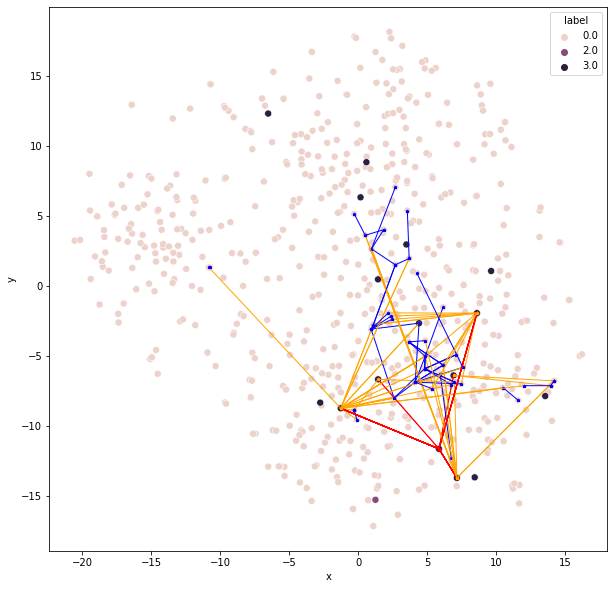

In [128]:
Q_node = query['id']
ax = plt.figure(figsize=(10,10))
sns.scatterplot(x="x", y="y", data=df_SL, hue= "label",s=50)
for i in range(50):
    item = ranked[i]['target_id']
    S_node = item['similar_node']['id']
    R_node = item['related_node']['id']
    T_node = item['target_node']['id']
    
    a_xloc = df_SL.loc[Q_node,'x']
    a_yloc = df_SL.loc[Q_node,'y']
    b_xloc = df_SL.loc[S_node,'x']
    b_yloc = df_SL.loc[S_node,'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='red',linestyle='-',linewidth=1,marker='*',markersize=3)
    
    a_xloc = df_SL.loc[S_node,'x']
    a_yloc = df_SL.loc[S_node,'y']
    b_xloc = df_SL.loc[R_node,'x']
    b_yloc = df_SL.loc[R_node,'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='orange',linestyle='-',linewidth=1,marker='*',markersize=3)
    
    a_xloc = df_SL.loc[R_node,'x']
    a_yloc = df_SL.loc[R_node,'y']
    b_xloc = df_SL.loc[T_node,'x']
    b_yloc = df_SL.loc[T_node,'y']
    x_plot = (a_xloc,b_xloc)
    y_plot = (a_yloc,b_yloc)
    plt.plot(x_plot,y_plot,color='blue',linestyle='-',linewidth=1,marker='*',markersize=3)
#     print(Q_node)
#     print(S_node)
#     print(R_node)
#     print(T_node)